#Proyecto 1 de Señales y Sistemas (IE-0247)
##Esutidante:
##Luis Brenes Campos C21324
##Docente:
##Marvin Coto Jiménez
##Escuela de Ingeniería Eléctrica
##8 de octubre de 2023

#Proyecto-Parte 1
Aqui se exponen comentarios sobre los resultados y código utilizado para la primer parte del proyecto, relacionada con la obtención de las gráficas y la frecuencia por medio de fórmulas.\
La mayoría de comentarios en el cógido que venian por defecto no serán modificados por su inmportancia, sin embargo, si se modificarán algunos y agregaran nuevos para mejorar la comprensión del código.

La primera parte del código se encarga principalmente de importar las librerias necesarias para la creación de las gráficas y extracción de información importante.

In [16]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

## Extracción y graficación de datos

Para un mayor control de las gráficas y los datos que se obtienen de los audios .wav, se crea una función capaz de realizar todo el proceso. Como parámetro recibe el audio a analizar y retorna el valor de dos variables: tiempo del ECG y la informacion de la onda.\
Entre los datos es inmportante quedarnos con un factor que menciona el codigo y que es de vital importancia modificarlo en diferentes partes del código. Este es el sampleRate, el cual, es la frecuencia de muestreo del que hablaremos más a profundidad a futuro.

In [3]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData #Variables necesarias para los ECG

Los archivos de audio de los 15 ECG se encuentran en una carpeta drive creada por el estudiante. Por lo tanto, se necesita de unas pequeñas líneas de código encargadas de importat el drive para posteriormente obtener los archivos .wav.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Obtaining data from several recordings and plotting.

In [5]:
#Carptae donde se contienen las muestras de audio
carpeta_audios = "/content/drive/MyDrive/Audios"

Con la ayuda de la bibliteca "os" se crea una lista donde se poseera la ruta completa de cada archivo de audio.\
Por medio de un for se ira invocando la funcion para obtener las variables importantes para las gráficas de cada archivo de audio elegido para crear después dichas gráficas.

In [ ]:
import os
archivos_audios = os.listdir(carpeta_audios)
for archivo_audio in archivos_audios:
    # Verifica que el archivo sea de tipo WAV
    if archivo_audio.endswith(".wav"):
      ruta_audio = os.path.join(carpeta_audios, archivo_audio)
      timeECG, waveData = ecg(ruta_audio)
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(archivo_audio)
#Se cambio la posición del plt.show() ya que así crea todas las gráficas después de analizar los audios, evitando algún tipo de error
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Preguntas

Algunas preguntas realizadas para esta parte del proyecto, necesitaban de código como apoyo. Para la pregunta A, se preguntaba sobre la señal con mayor amplitud. Después de una vista de las gráficas anteriores sobre cuál sería, se realizó un acercamiento (close up) para la que se determinó con dicha característica. Gracias a ello, es más fácil apreciar su amplitud tanto en las crestas como en los valles.

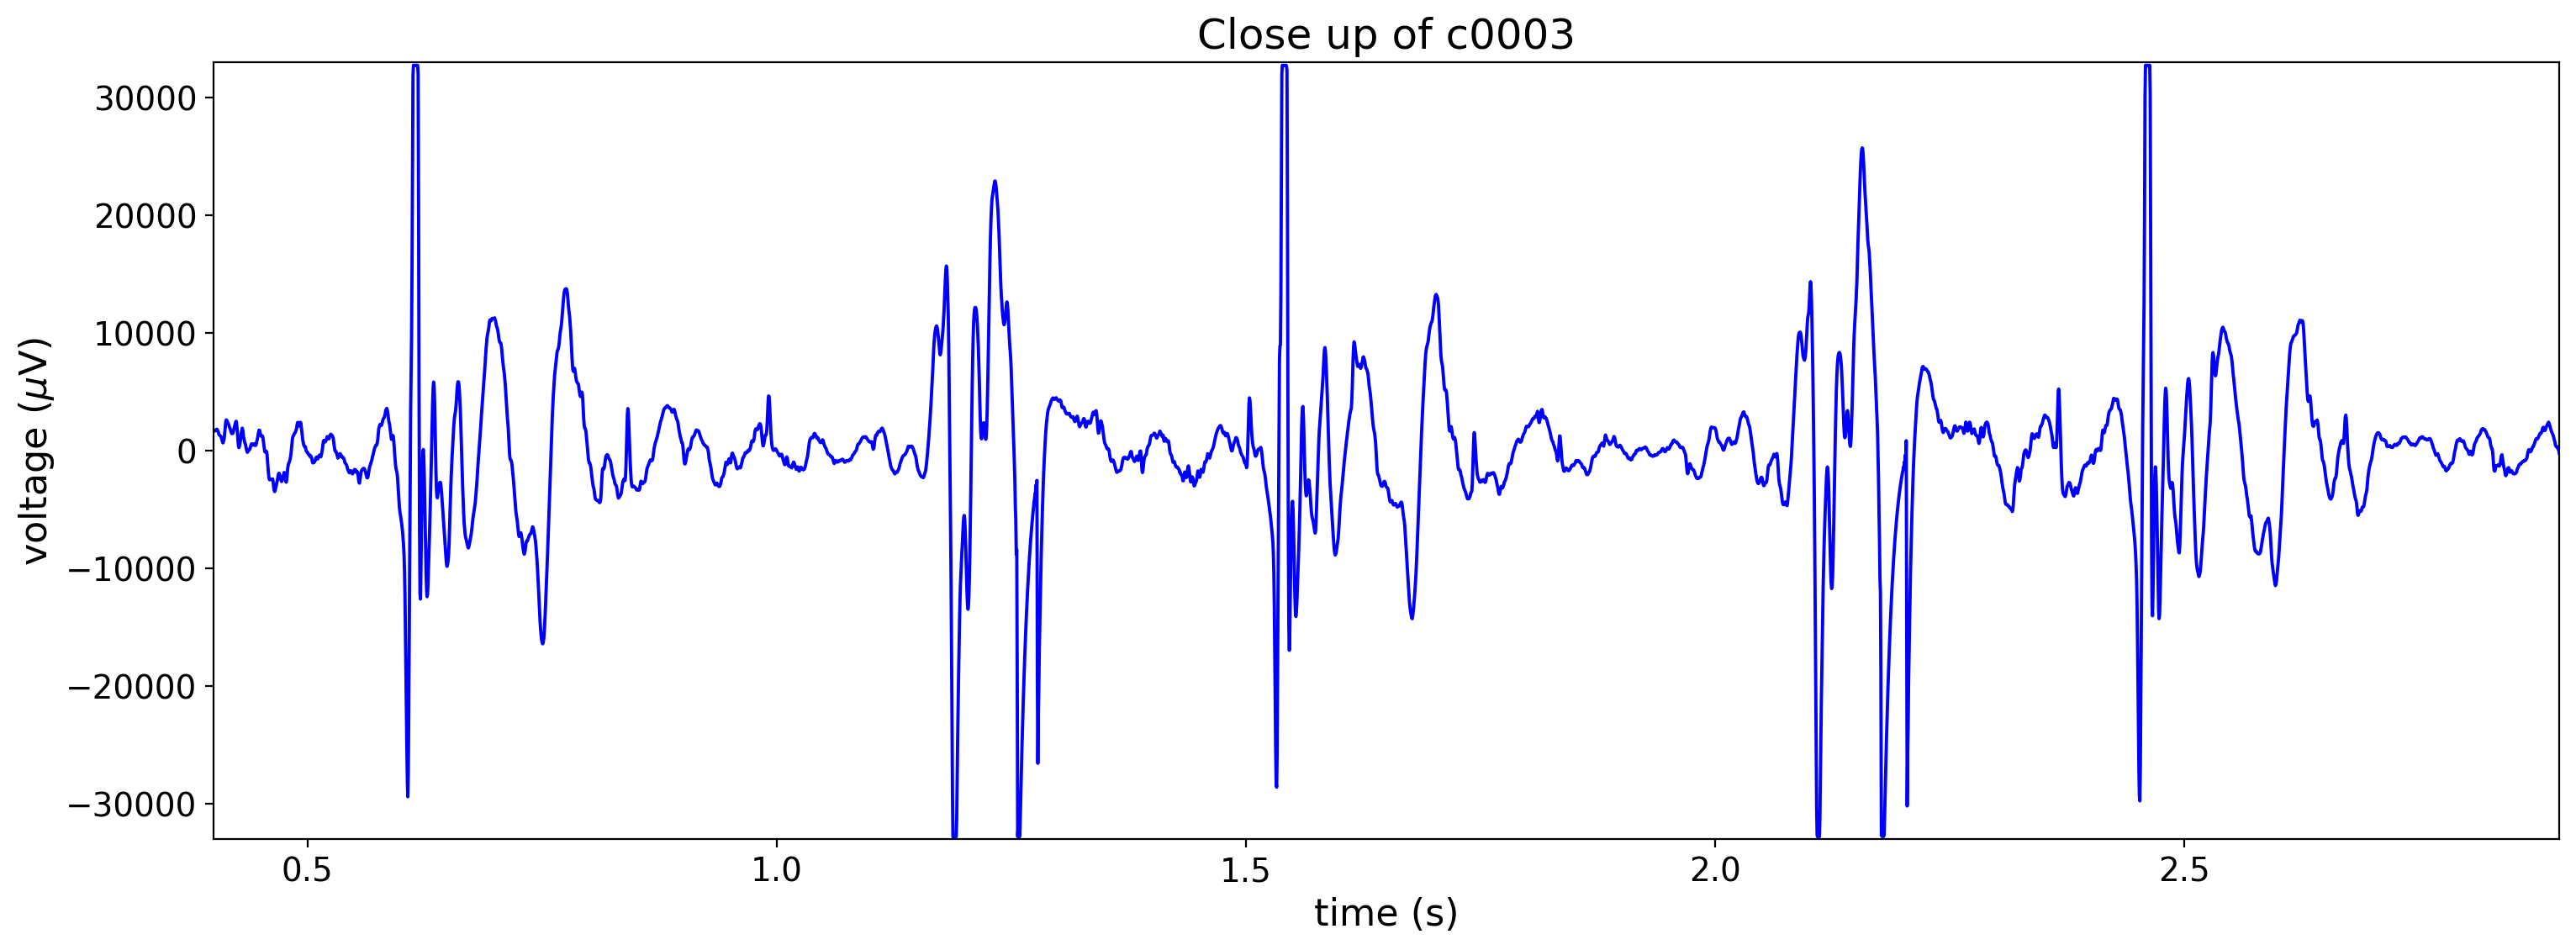

In [ ]:
#Close up para pregunta A
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/c0003.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
#Límites encargados de acercar la gráfica.
plt.ylim(-33000,33000)
plt.xlim(.40,2.9)
plt.title("Close up of c0003")
plt.show()

Como se mencionó en la primera parte, el ECG c0003 posee la mayor amplitud: su amplitud de onda de 33000 μV y una amplitud de pico a pico de aproximadamente 63000 μV.

Para la pregunta C se eligió el audio e00255. Aquí se observa como primero se realizó un acercamiento a la gráfica de manera arbitrarias para posteriormente analizar la duración de un latido o duración de un ciclo.

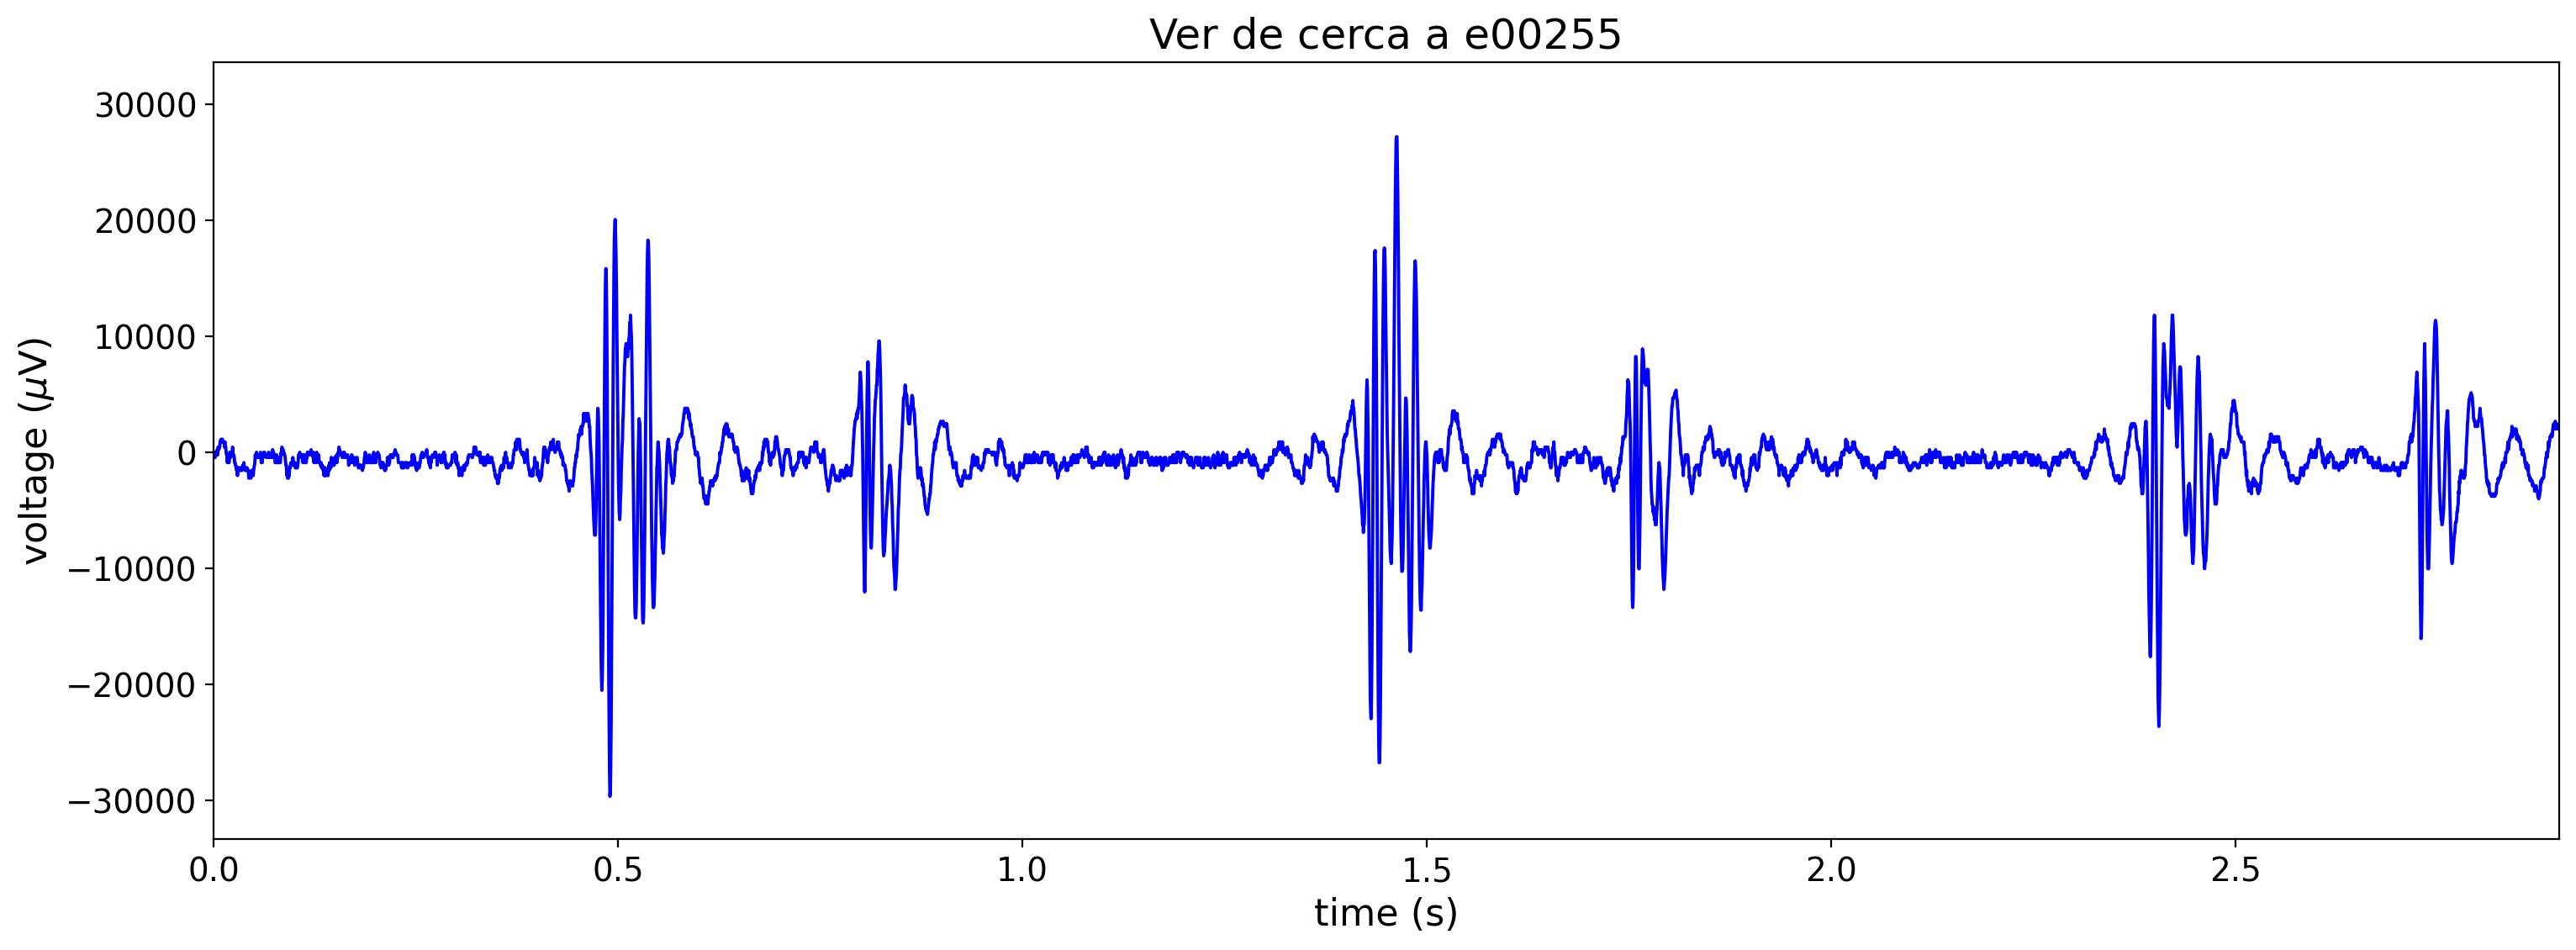

In [ ]:
#Primer vistazo a e00255
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00255.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
#Límites arbitrarios
plt.xlim(0,2.9)
plt.title("Ver de cerca a e00255")
plt.show()

Con dicho aceramiento es más fácil reconocer la duración de un latido que se determinó en 0.95 segundos e iniciando el primero a los 0.46 segundos.

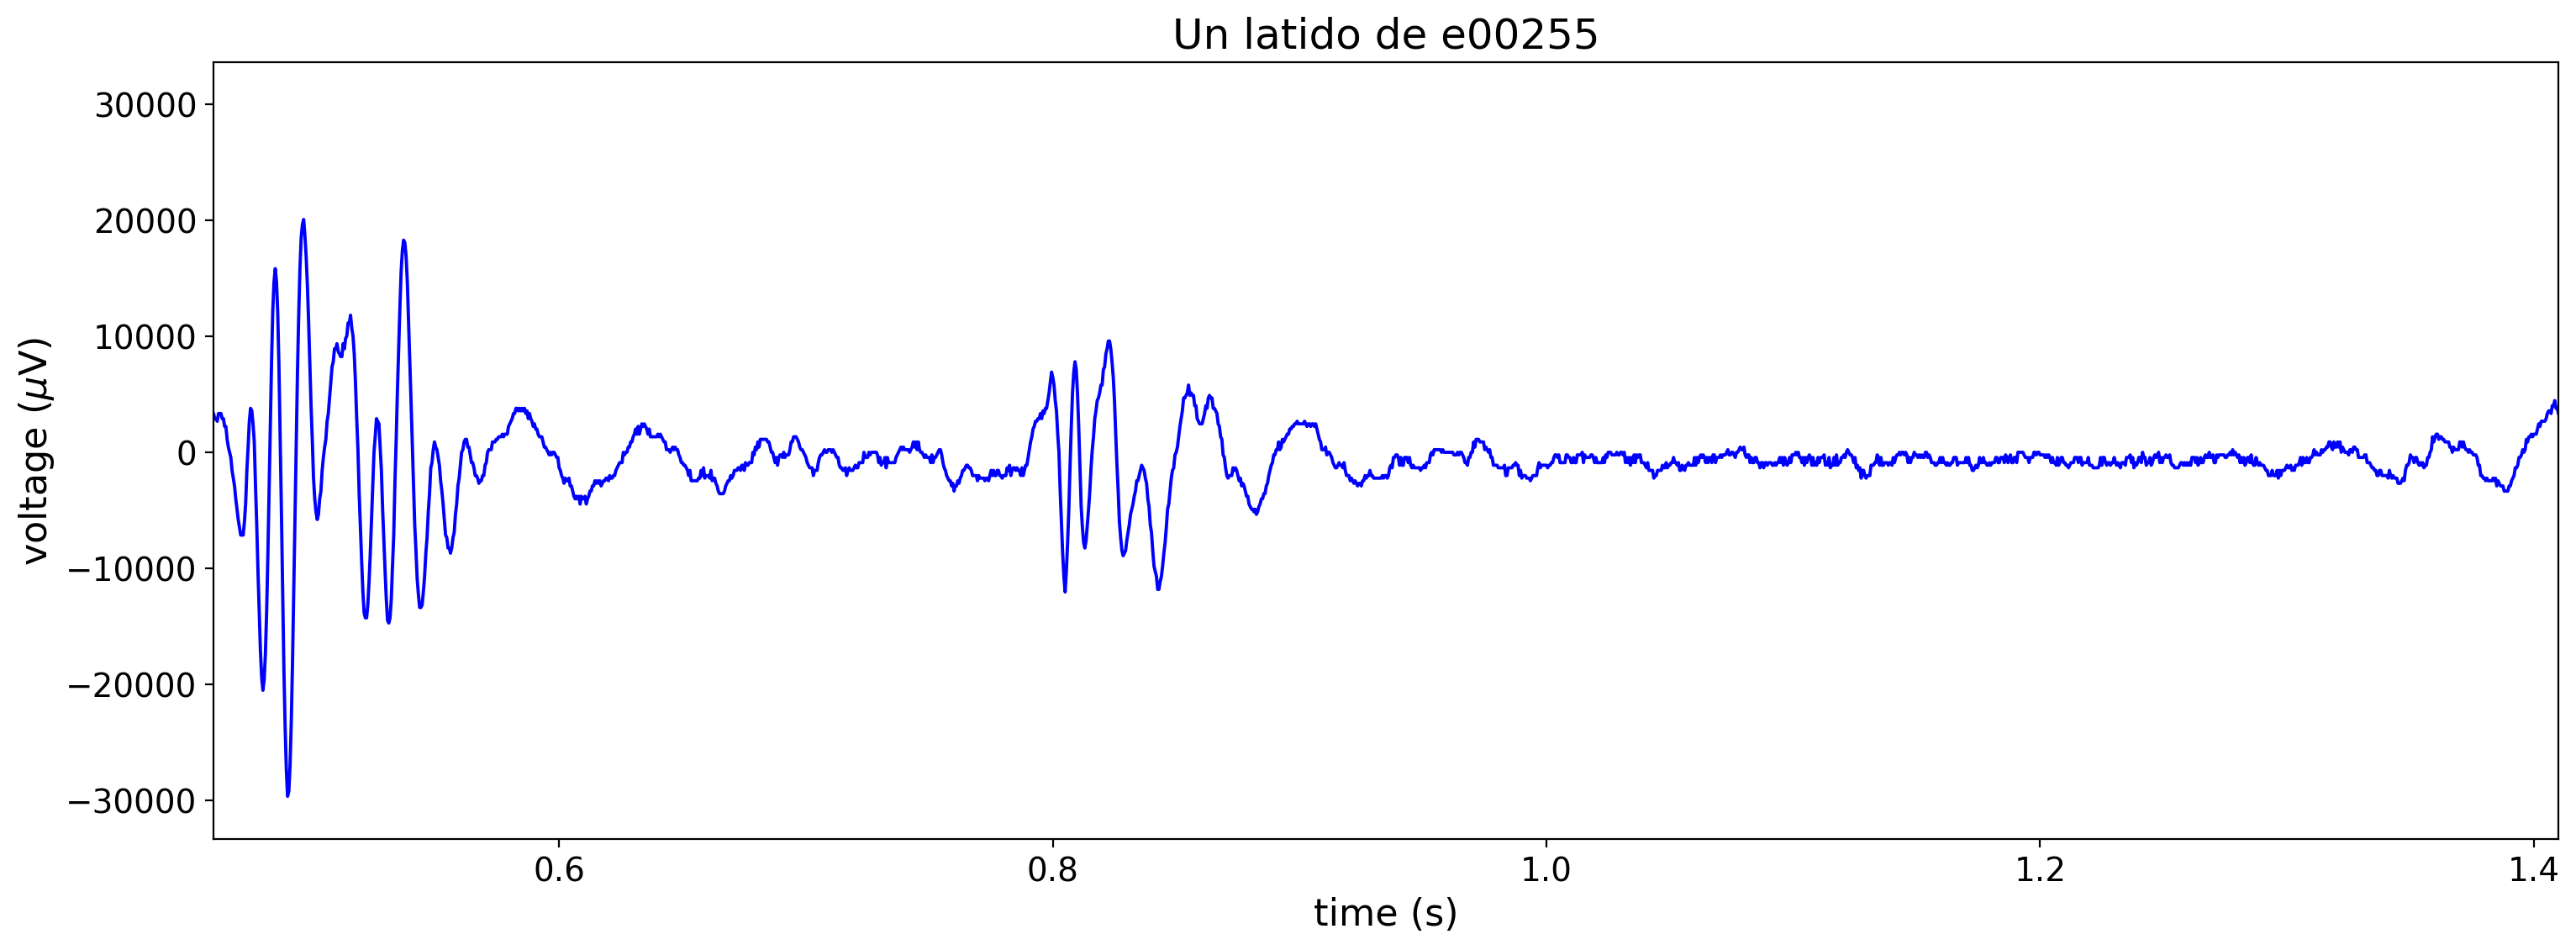

In [ ]:
#Un latido de e00255
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00255.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
#Límite donde 0.46 es el inicio del latido y 1.41 es la suma desde el inicio hasta el final del primer latido
plt.xlim(0.46,1.41)
plt.title("Un latido de e00255")
plt.show()

Para tres latidos es simplemente sumarle dos veces más la duración de un latido al límite final de x.



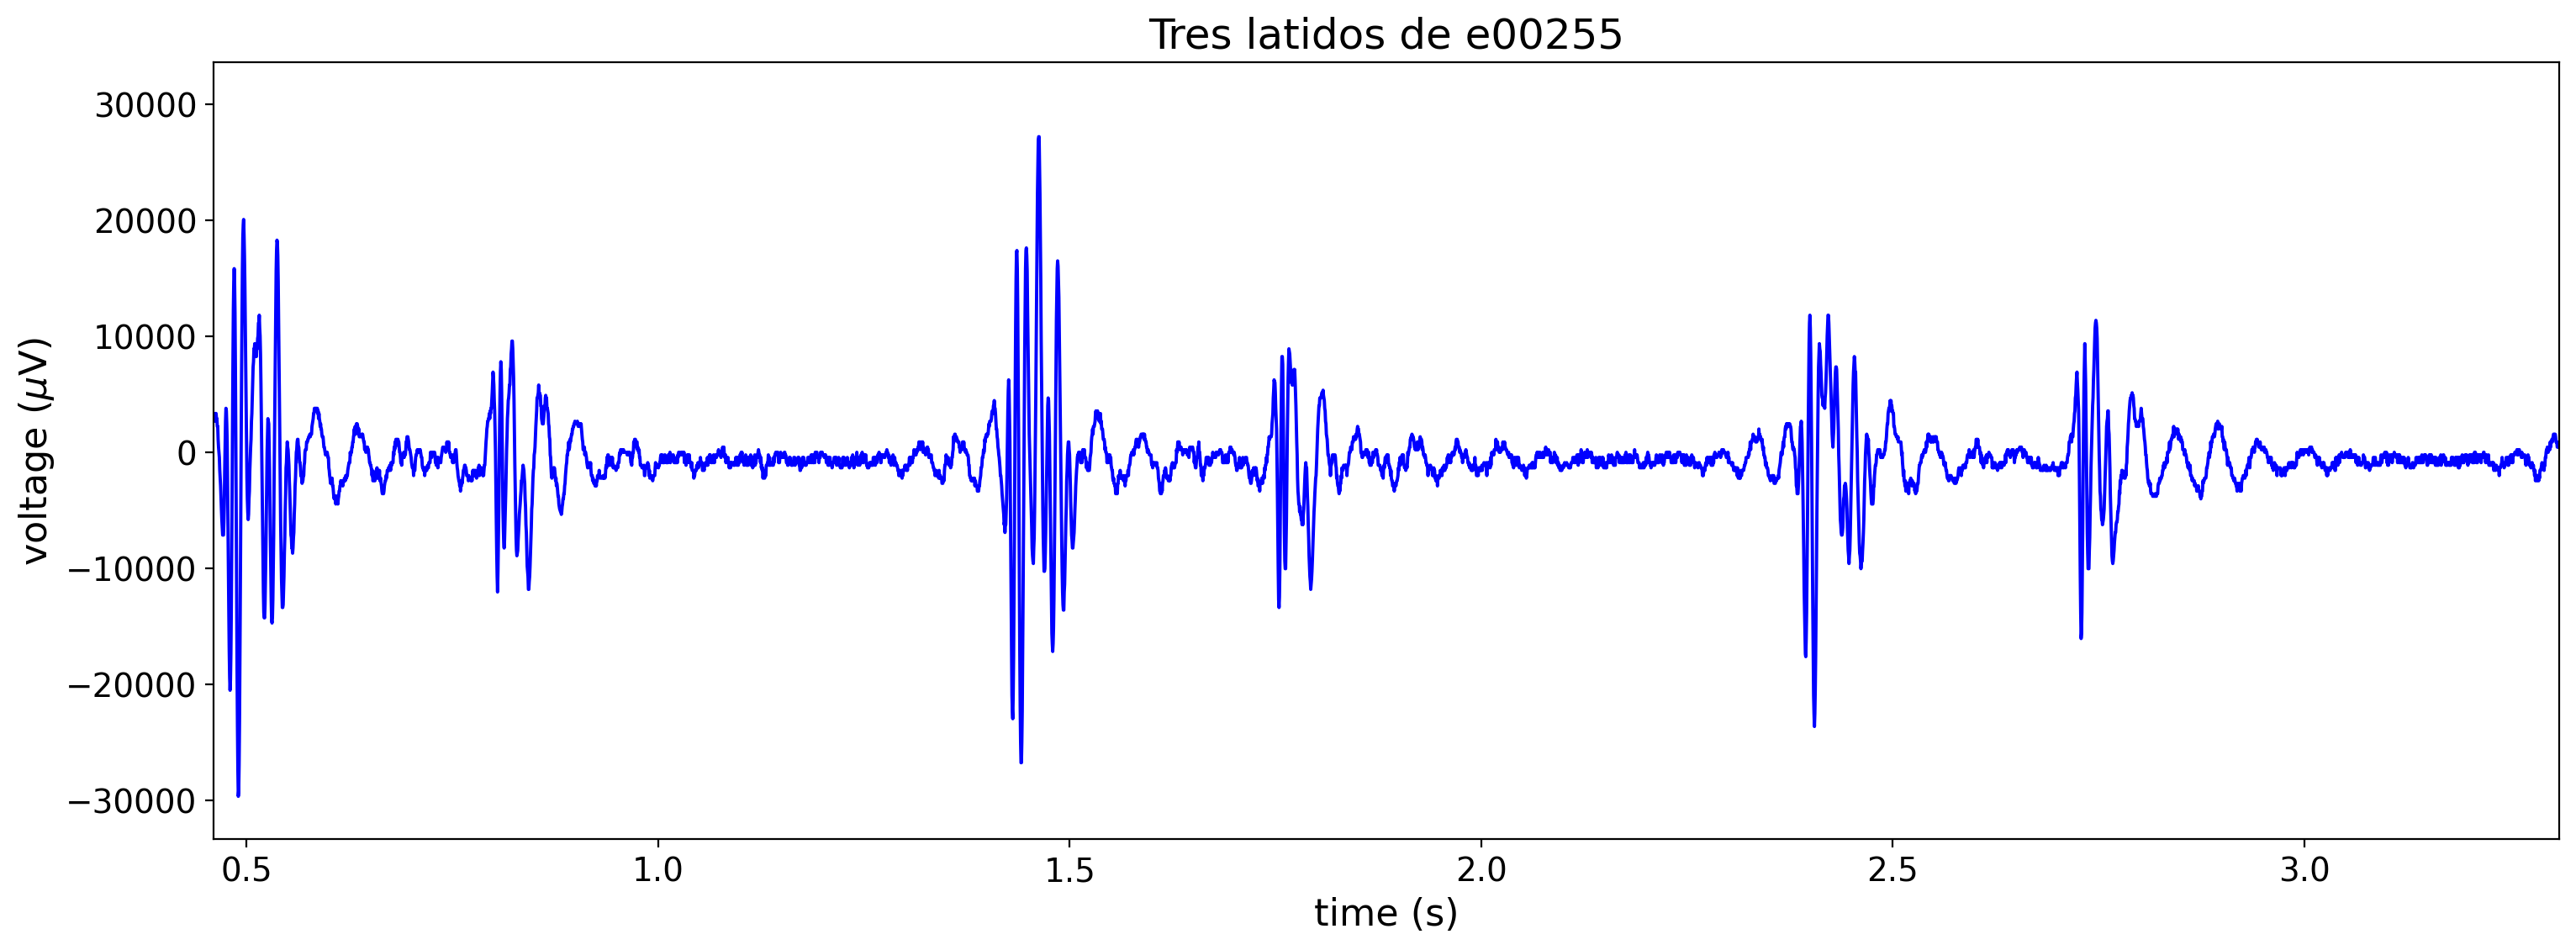

In [ ]:
#Tres latidos de e00255
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00255.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
#Inicio del primer latido en 0.46 y final del tercer latido en 3.31
plt.xlim(0.46,3.31)
plt.title("Tres latidos de e00255")
plt.show()

Para calcular la frencuia con los datos obtenidos, nada más debemos utilizar la siguiente fórmula:
$$F=\frac{1}{{Tiempo \space de \space un \space latido}}$$
Para e00255:
$$F=\frac{1}{{0.95 \space s}}=1.0525 \space Hz$$

#Parte Extra
La siguiente parte del código no es necesaria para esta parte del proyecto. Sin embargo, es de gran provecho para la comprensión de las señales y una manera más nítida de observar los latidos de un ECG.\
Para mejor ejemplo se utilizarzá la misma señal que se usó en la pregunta C y posteriores.

Primero, se obtiene de manera normal otra gráfica de ECG e00255.

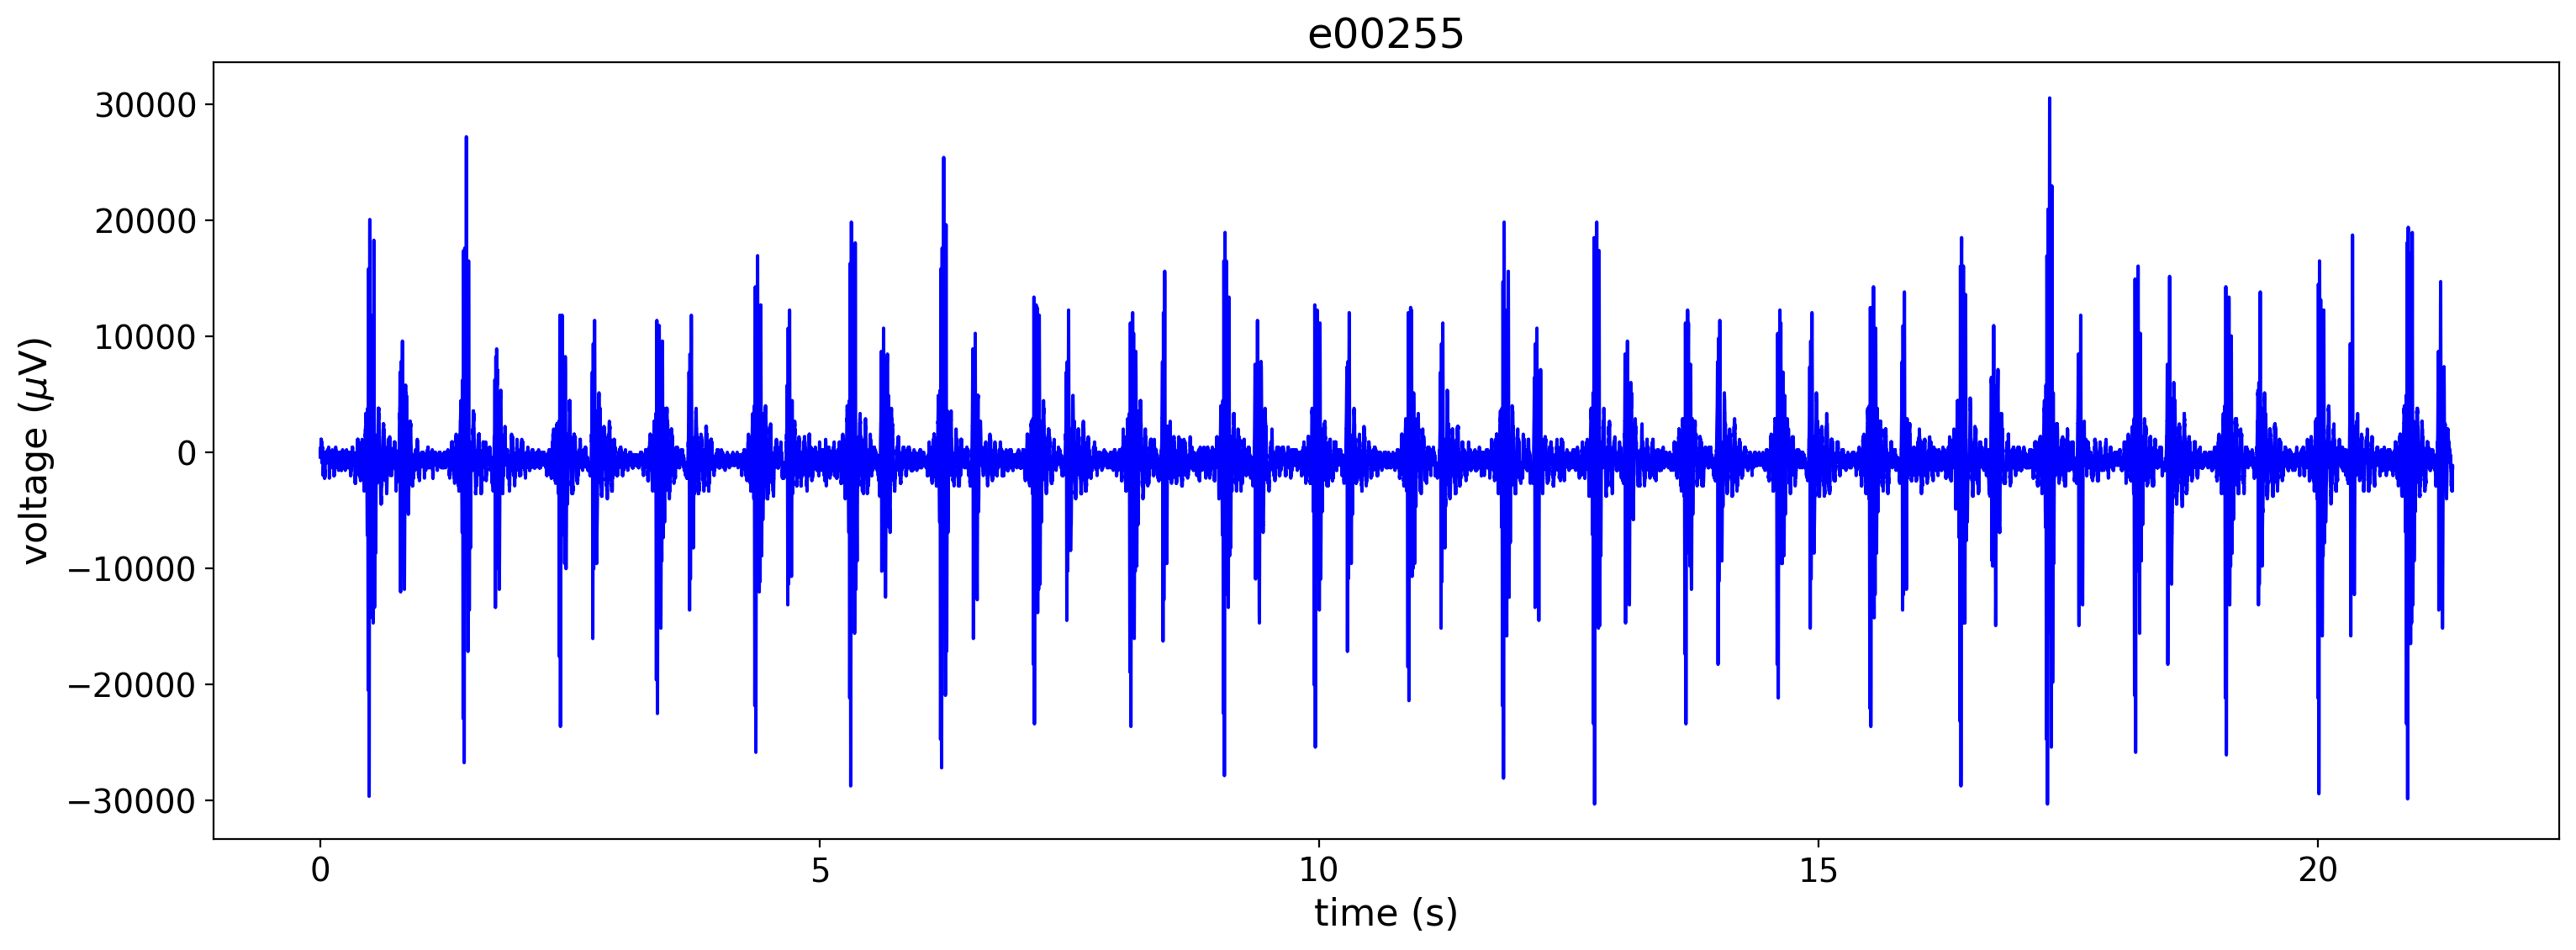

In [ ]:
#Gráfica para e00255
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00255.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.title("e00255")
plt.show()

Segundo, se corta la gráfica en ondas completas. De antemano sabemos que, tres latidos van del segundo 0.46 al 3.31, por lo qué, utilizaremos estos valores.

Aquí es donde nuevamente tenemos que mencionar el sampleRate, ya que, el código por defecto va a multiplicar los valores que le brindemos por 10000. Este valor es al parecer la fecuencia de muestreo de los datos utilizados en la gráfica que venia con el código y no es la misma frecuencia de nuestros datos. Para realizar el cambio primero debemos encontrar nuestra frecuencia real.

In [ ]:
#Código para obtener la frecuencia real demuestreo
archivo_audio = "/content/drive/MyDrive/Audios/e00255.wav"

with wave.open(archivo_audio, 'rb') as archivo_wav:
    frecuencia_muestreo = archivo_wav.getframerate()
    print("Frecuencia de muestreo:", frecuencia_muestreo, "Hz")

Frecuencia de muestreo: 2000 Hz


Una vez obtenida dicha frencuencia, se puede seguir con la onbtención de los puntos que se usarán en la gráfica.

In [ ]:
#Puntos elegidos
n1 = .460
n2 = 3.31
0
m1 = int(n1*2000) #Este es el valor modificado ahora a 2000 Hz en vez de los 10000 Hz
m2 = int(n2*2000)

print(timeECG[m1])
print(timeECG[m2])

0.46001077359065046
3.3100775230109845


Se crea una gráfica con los nuevos parámetros.

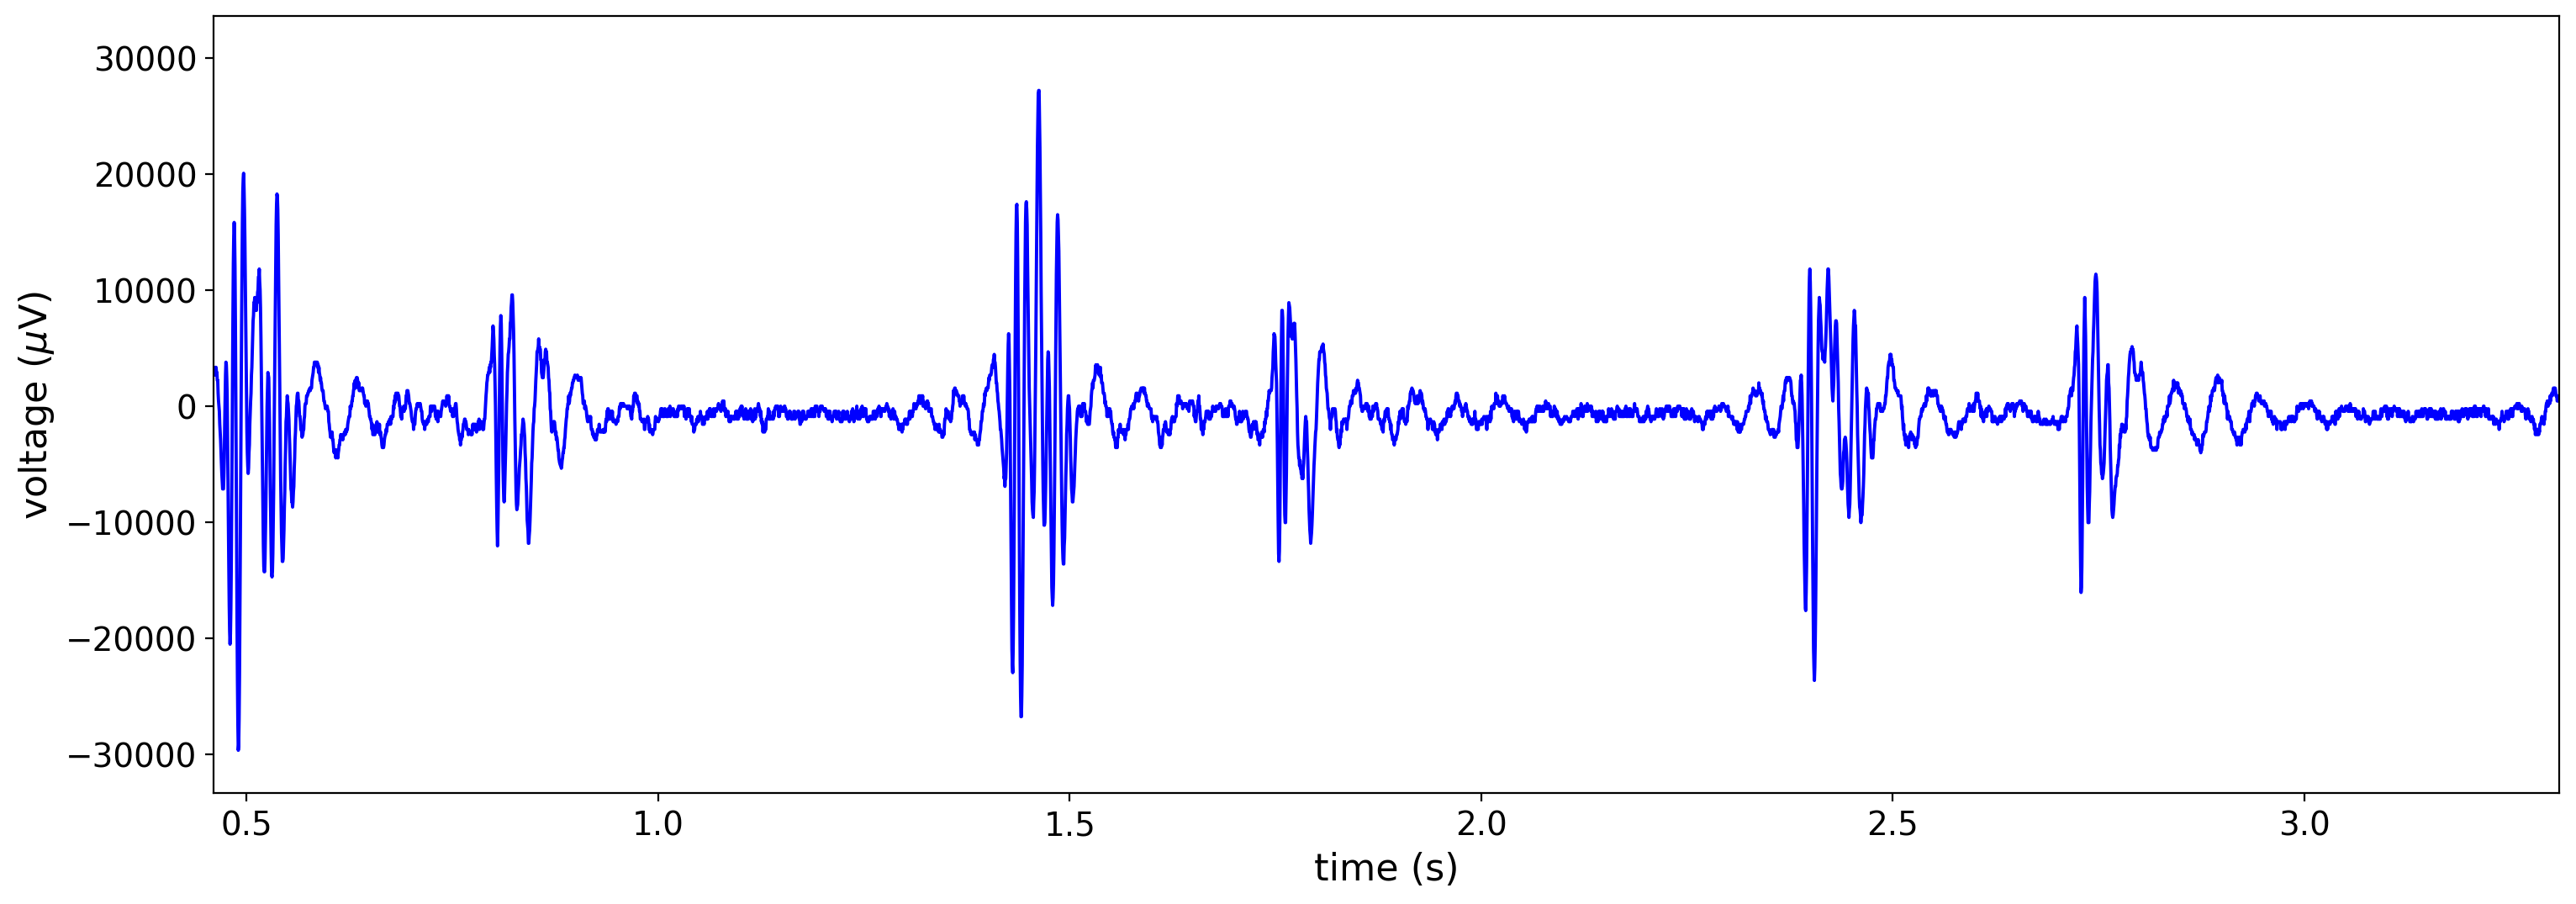

In [ ]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.show()

Finalmente, se realizar un corte con el cual podemos observar de mejor manera la gráfica en los latidos elegidos de una manera más agradable a la vista.

In [ ]:
timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]

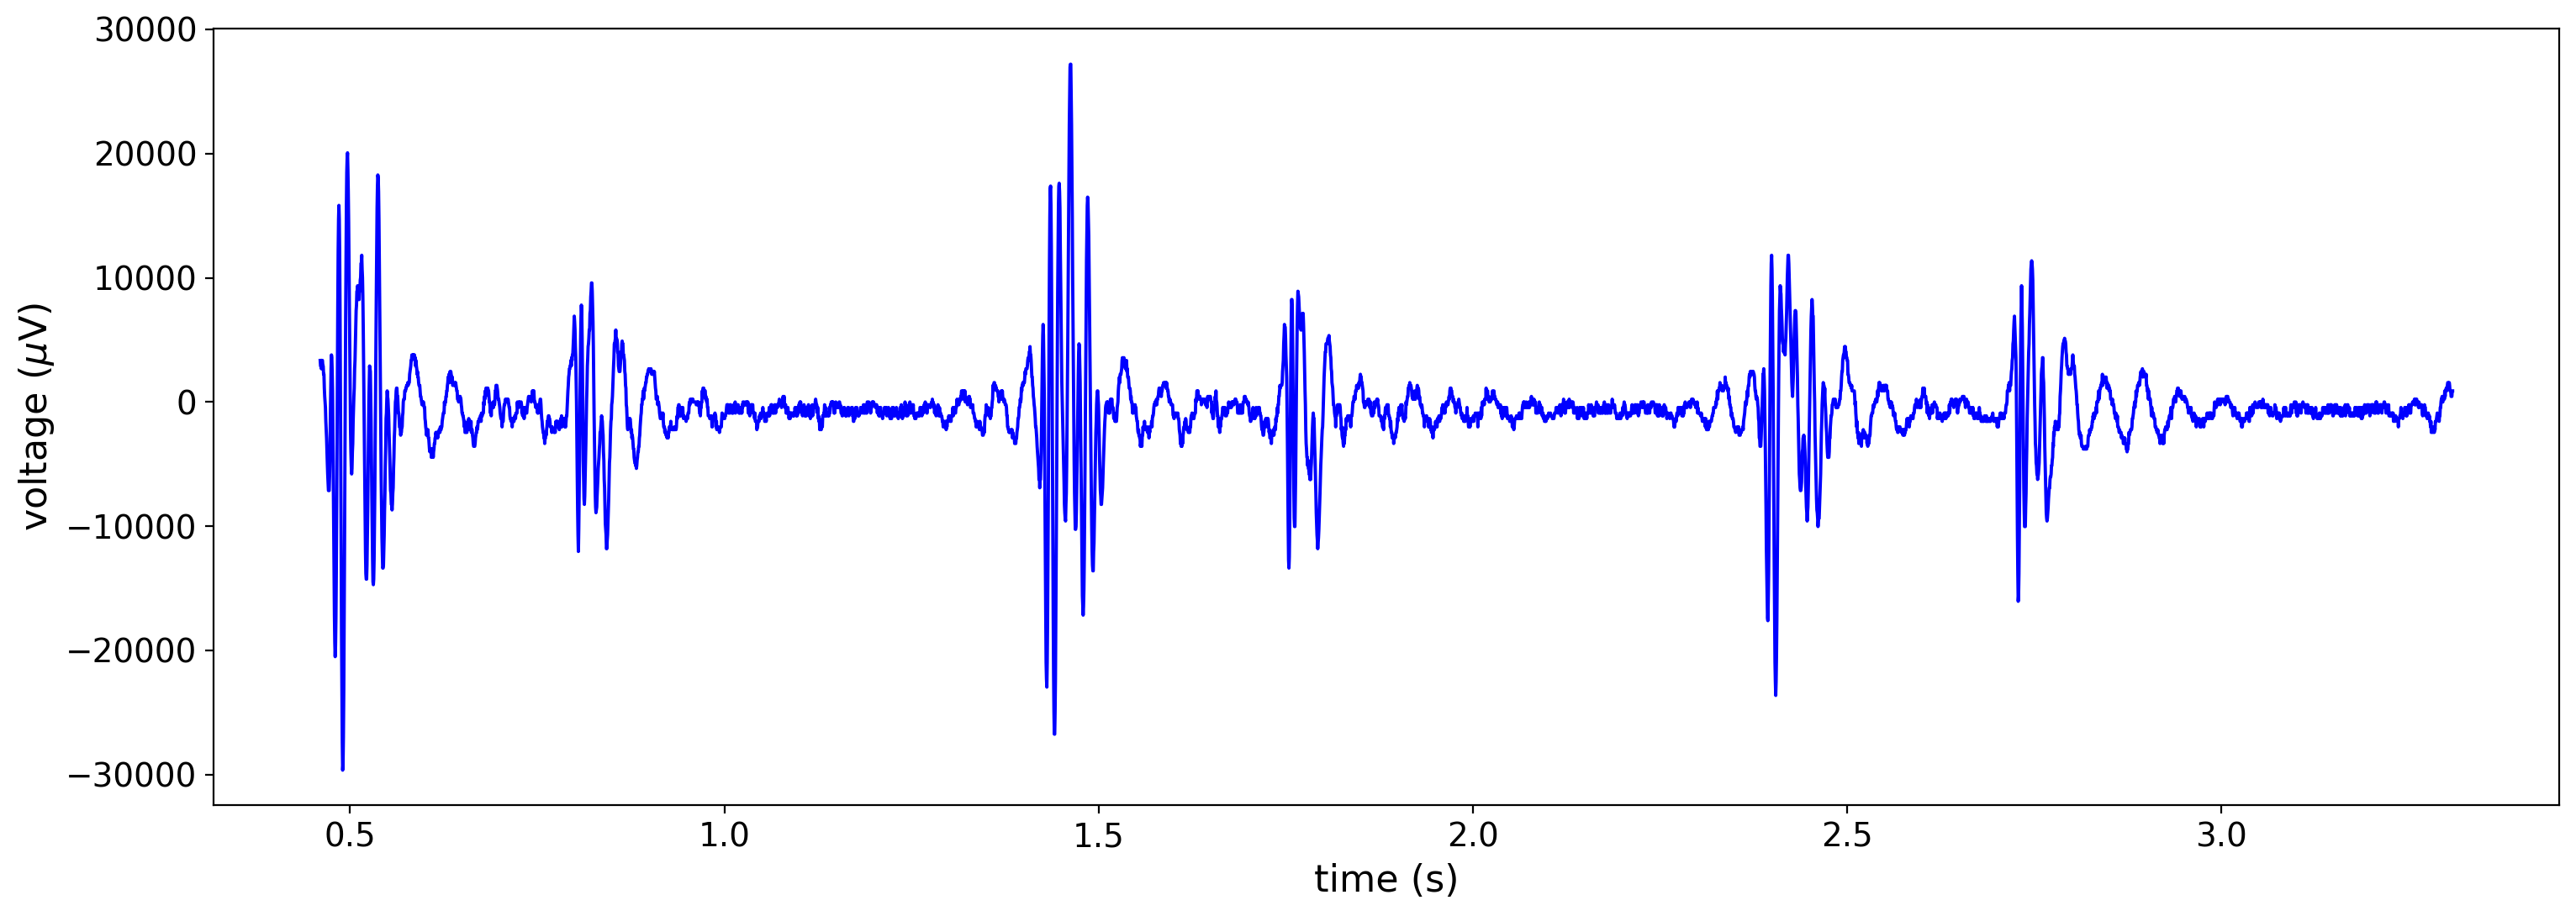

In [ ]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.show()

# Proyecto-Parte 2

Como lo hemos visto a lo largo del proyecto, cada señal posee características y propiedades únicas que las diferencian entre ellas. A su vez, esto nos ayuda a analizar sobre las características más comunes de un tipo de señal en específico como lo son los ECG.\
Una de esas propiedades especiales y de mayor relevancia es la frecuencia.
La frecuencia de un electrocardiograma es información importante para un análisis completo sobre un paciente. Con ello, se puede saber la reacción del corazón en varias circunstancias como lo es al ejercicio. También, ayuda a mantener un control sobre un paciente con problemas arritmicos y saber qué cambias han sucedido conforme se realizan diferentes medidades de esta propiedad. Esto se debe a que existen estándares que ayudan a determinar cuando existe una anomalía en la frecuencia cardiáca.\
Auque en pasos anteiores del proyecto logramos obtener a mano la frecuencia de una señal por los métodos convencionales, existen script que pueden realizar el proceso de manera más rápida y sin la necesidad de posee conocimientos sobre señales.\
Por ello, esta parte del proyecto tiene como objetivo utilizar las herramientas de script brindadas por le profesor para la obtención de la frecuencia cardíaca de los 15 audios elegidos y observar el funcionamiento del código. Finalmente, se evaluará si el código es eficaz y puede llegar a tener usos en la médicos reales.

# Picos R
Para poder determinar la frecuencia cardíaca de una señal es importante crear una función que encuentre los picos R de la función. Estos picos son los puntos más altos del ECG por lo que se conocen por el nombre de máximos locales.

In [6]:

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

El siguiente paso es invocar la función creada al inicio del proyecto para la generación del gráficas. Después se utiliza la función para detectar los picos R o máximos locales.\
Existe un problema para calcular los máximos locales. La función creada para el cálculo de la frecuencia cardíaca no funciona para una gran parte de los archivos de audio elegidos. Por ello, dividiremos el proceso en dos: análisis de archivos que logra compilar el código y otro en los que no. Cuando se realice el análisis de los casos defectuosos hablará más sobre el porqué de este error.


#Casos de compilación correcta


Tomaremos como ejemplo el archivo de audio e00030 para la explicación del proceso y cómo funciona para después realizar el resto de casos correctos con tan solo un análisis sobre la frecuencia cardíaca obtenida.

Una vez invocadas las funciones para la señal dada, se realiza una gráfica del ECG con la diferencia de que ahora marcará en rojo los puntos de interés, o sea, los máximos locales.

In [17]:
#Datos para el ECG e00030
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00030.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

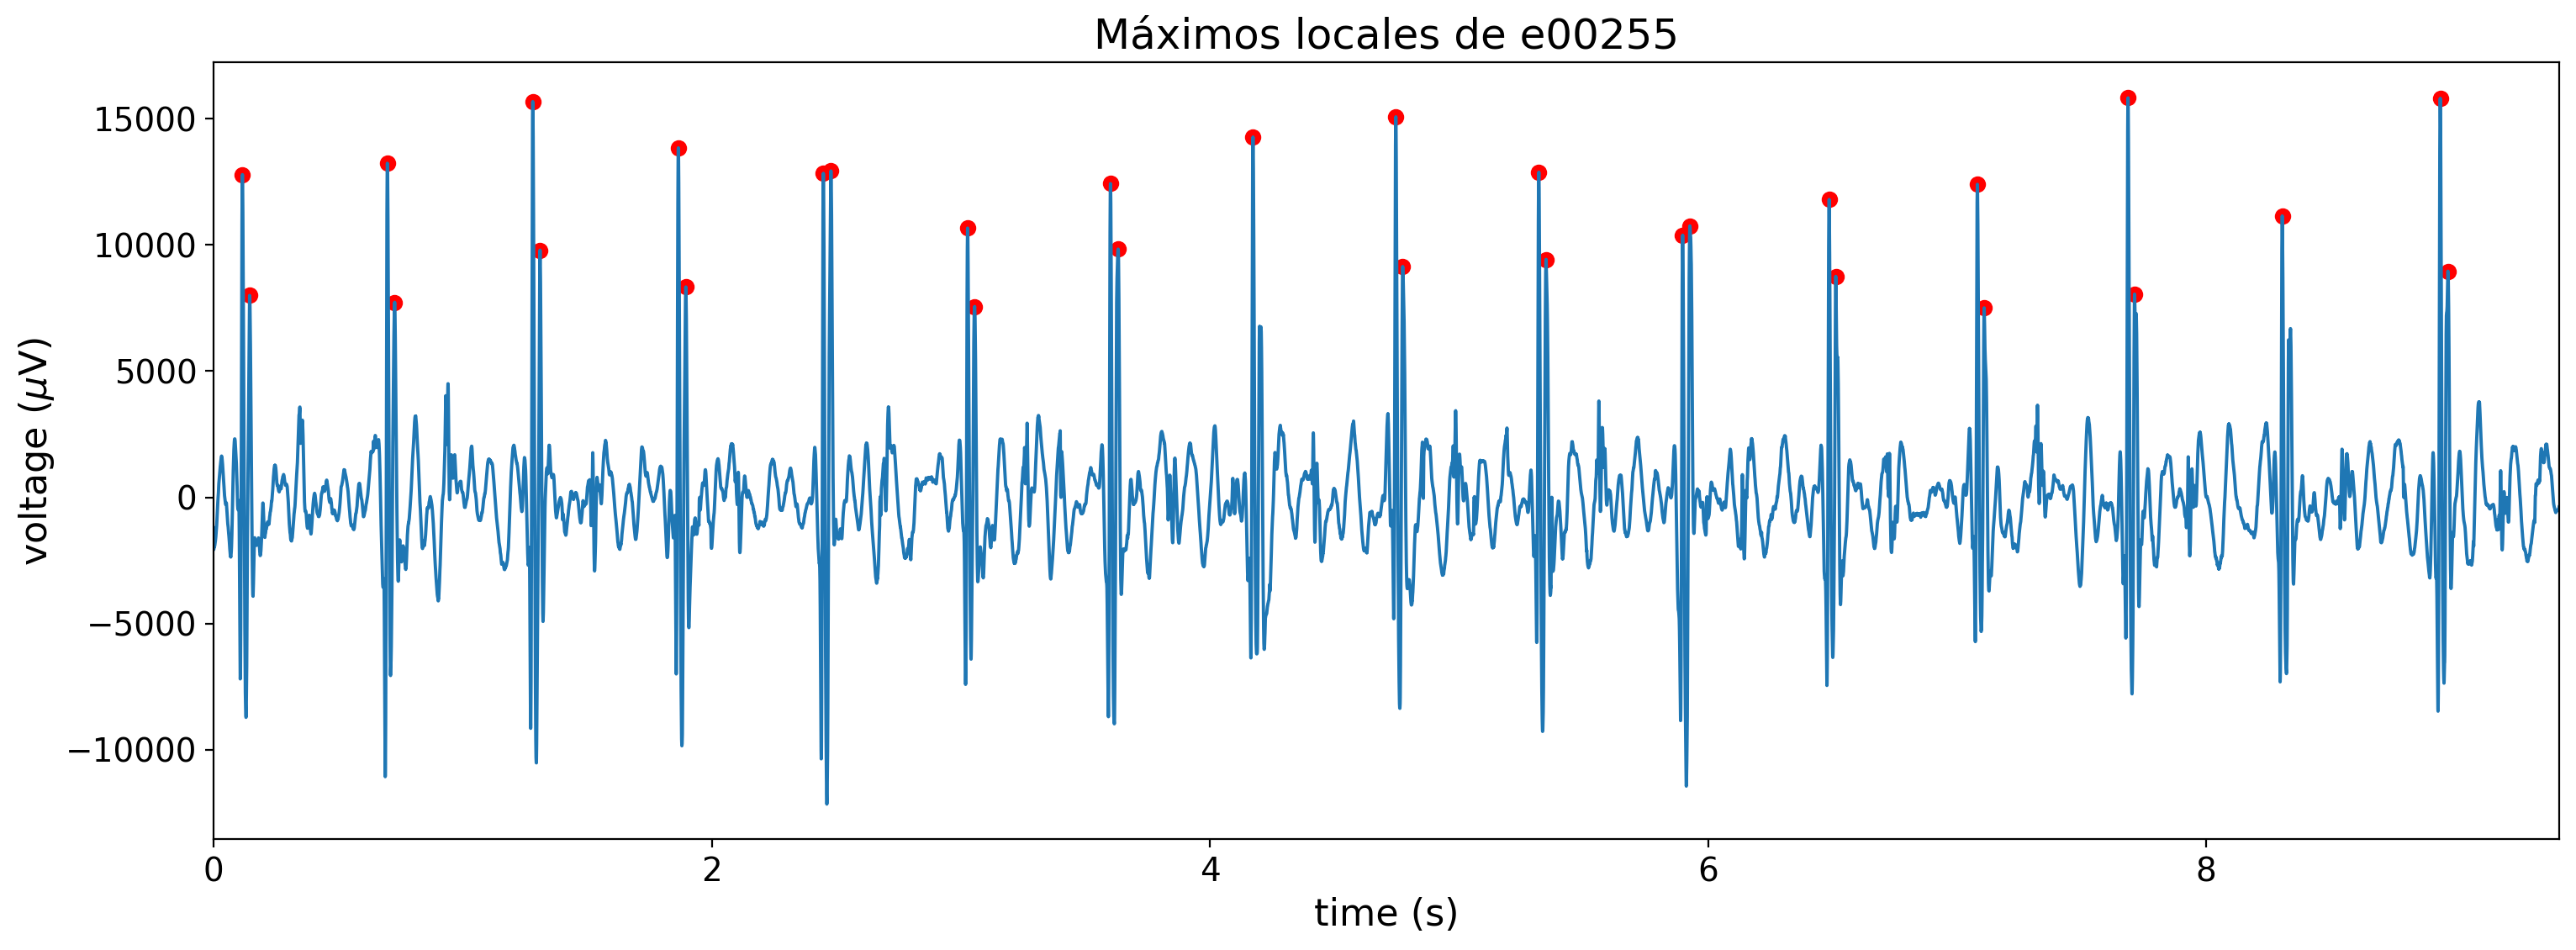

In [18]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r') #Nuevo comando para trazar los puntos de los máximos locales
plt.title("Máximos locales de e00255") #Se le agregó nombre a las gráficas para mejor visualización
plt.show()

Se observa como le gráfico fue realizado de manera exitosa y marca los picos R. Sin embargo, un aspecto que podría causar errores a futuro es que marca dos puntos máximos en una sola señal y esto podría causar un error.\
Ahora, para un mejor análisis se realizará un acercamiento de la señal donde se deben destacar dos factores:\
- El init_sec y el end_sec que son los puntos límite elegidos arbitrariamente para el acercamiento deben ser número enteros, ya que, de no serlo el código no puede compliar.
- Se observa nuevamente la multiplicación por 2000 como se realizó en la parte extra. Recordemos que, el código por defecto lo multiplica por 10000 lo cual no es correcto por el muestreo con el que se tomaron los archivos de audio utilizados en este proyecto.

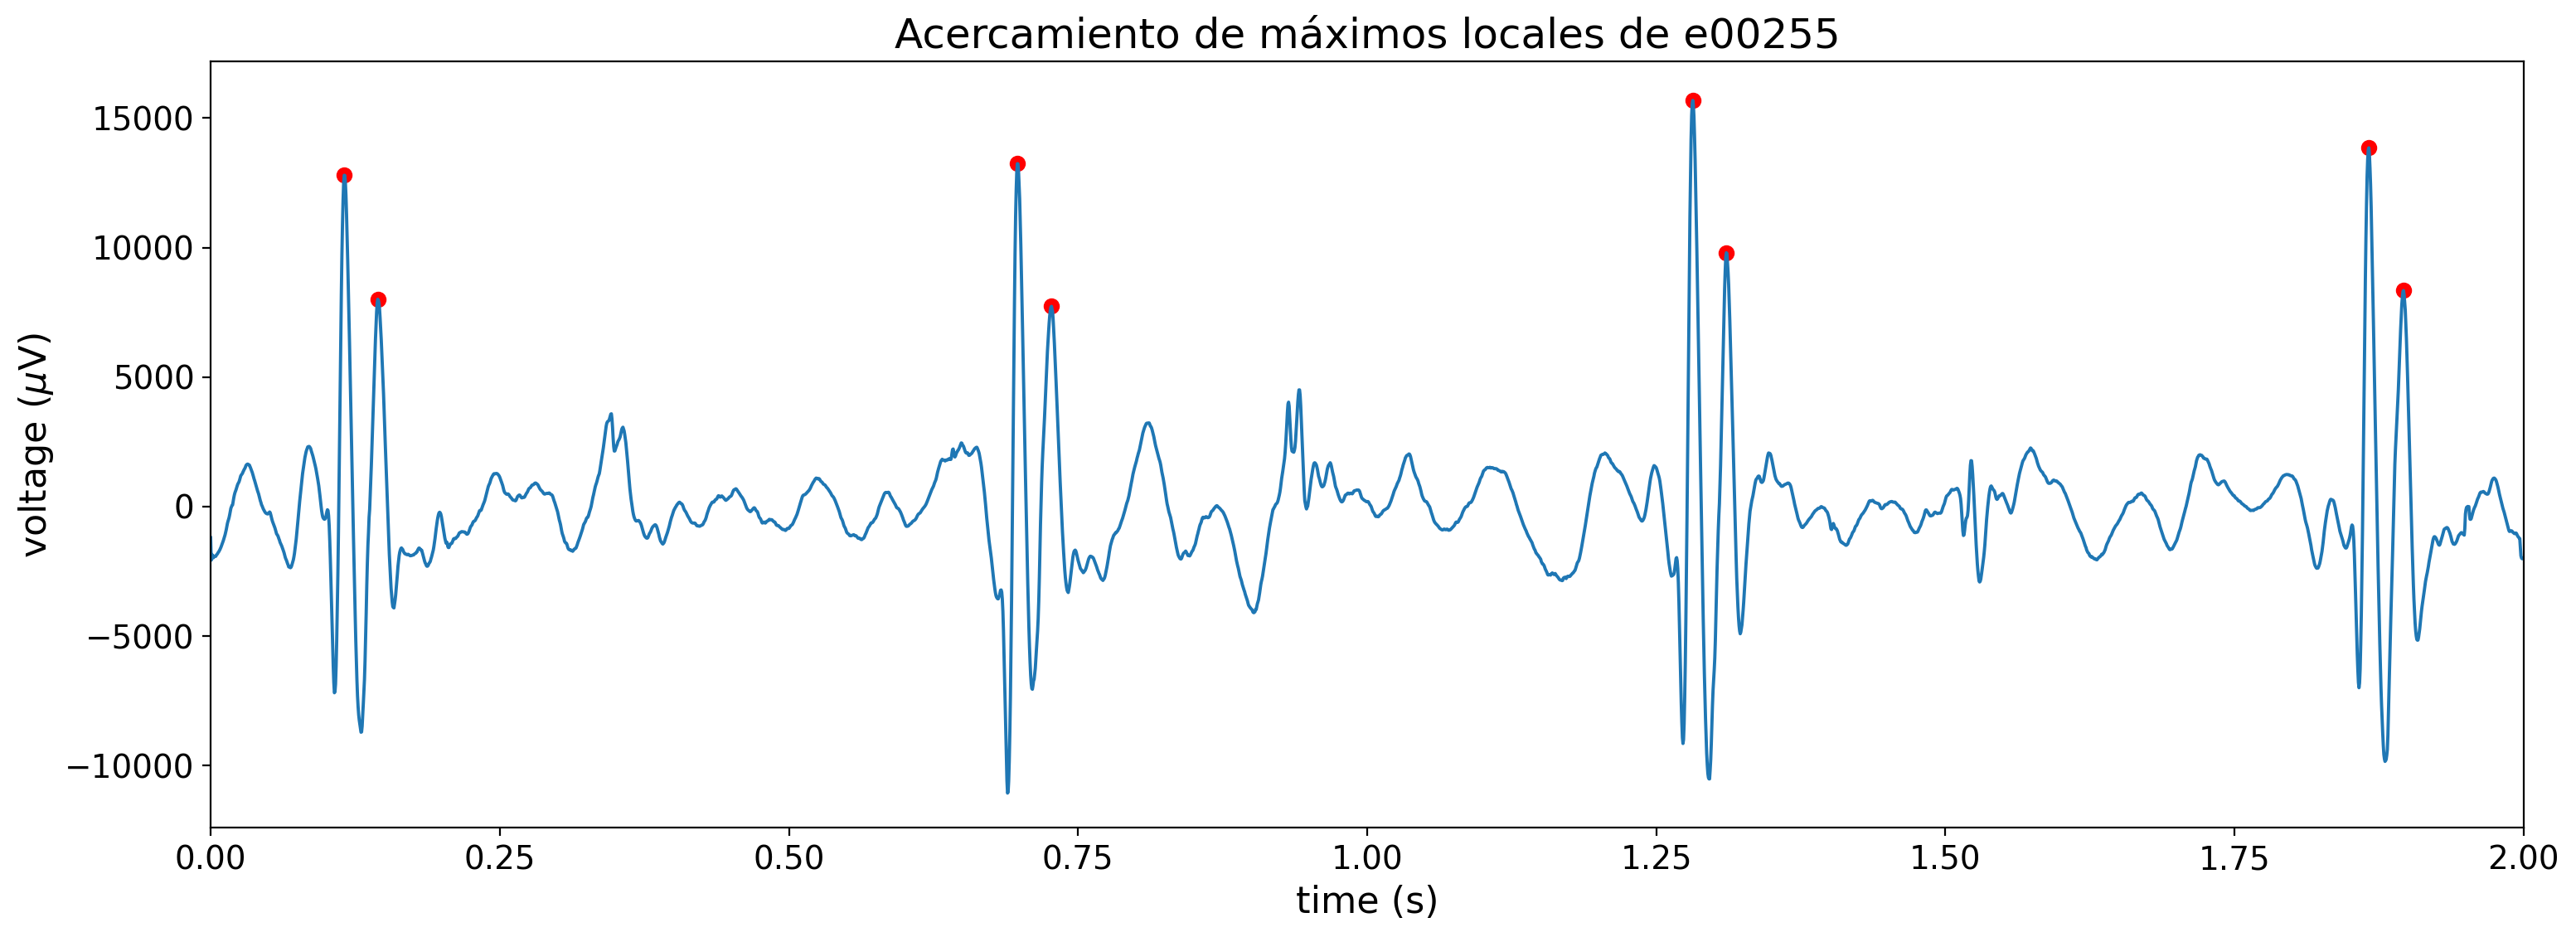

In [19]:
# Acercamiento de e00030
# Puntos arbitrarios elegidos
init_sec = 0
end_sec = 2
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000]) #Aquí se observa la multiplicación por 2000 en vez de 10000
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.title("Acercamiento de máximos locales de e00255")
plt.show()

#Frecuencia cardiáca
La fórmula para calcular la frecuencia cardiaca en latidos por minuto (es la siguiente):\
$$LPM=\frac{Cantidad \space de \space picos \space R}{{Tiempo \space total \space de \space la \space señal  }} \times 60$$
Las siguientes lineas de codigo se encargaran de ese proceso.


In [20]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 191.1335280063711


Hemos obtenido como resultado el un valor de 191.1335 LPM aproximadamente. Lo cual supera el estandar. Según Sanagustín, A. (2023) menciona que, el estándar se encuentra entre los 60 a 100 LPM.


Como siguiente y último paso con el código es la creación de una gráfica que se encarga de crear tres gráficos diferentes en uno solo:\
- Una gráfica lineal roja vertical que es la media de la frecuencia cardíaca.
- Una gráfica en un rojo más suave en forma de rectángulo que muestra la desviasión estandar.
- Una gráfica en azul que va de punto a punto de la frecuencia cardíaca en cómo varía entre ciclos.

In [21]:
#Obtención de la frecuencia
#Utiliza los puntos máximos de pasos anteriores
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

#Se calculan punto importantes para la generación de las gráficas como lo es por ejemplo std_vec_plus (Frecuencia más desviación)
mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

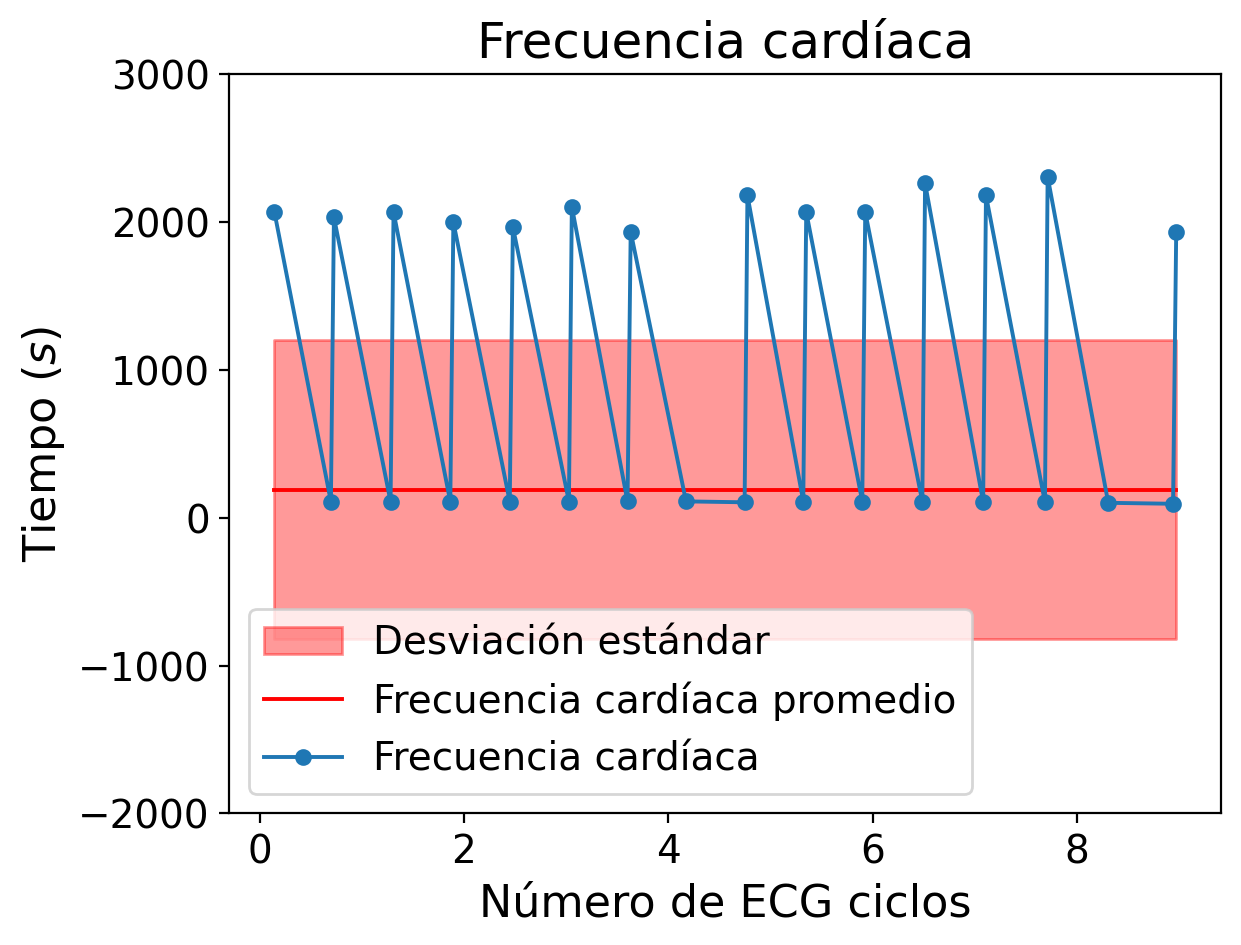

In [22]:
#Gráfica de desviación
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación estándar", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca promedio")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
plt.ylim((-2000, 3000))
plt.title("Frecuencia cardíaca")
plt.xlabel(r'Número de ECG ciclos')
plt.ylabel(r'Tiempo ($s$)')
plt.legend()
plt.show()

Observando las gráficas podemos ver que existe una desviación y un cambio abrupto en la frecuencia para cada uno de los ciclos. Este problema tien una razón y va de la mano a que por cada ciclo se tomaron dos picos R y no uno. Estos dos picos R que toma se encuentran muy cerca y a su vez alejados de los siguientes dos puntos, haciendo que el código analice que existen ciclos muy largos y otros muy cortos.\
Ahora, se realizará el mismo proceso para cada una de las muestras de audio que cumpla con los estándares para obtener los máximso locales y después se realizará un análisis general.

In [54]:
#Datos para ECG d0005
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/d0005.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

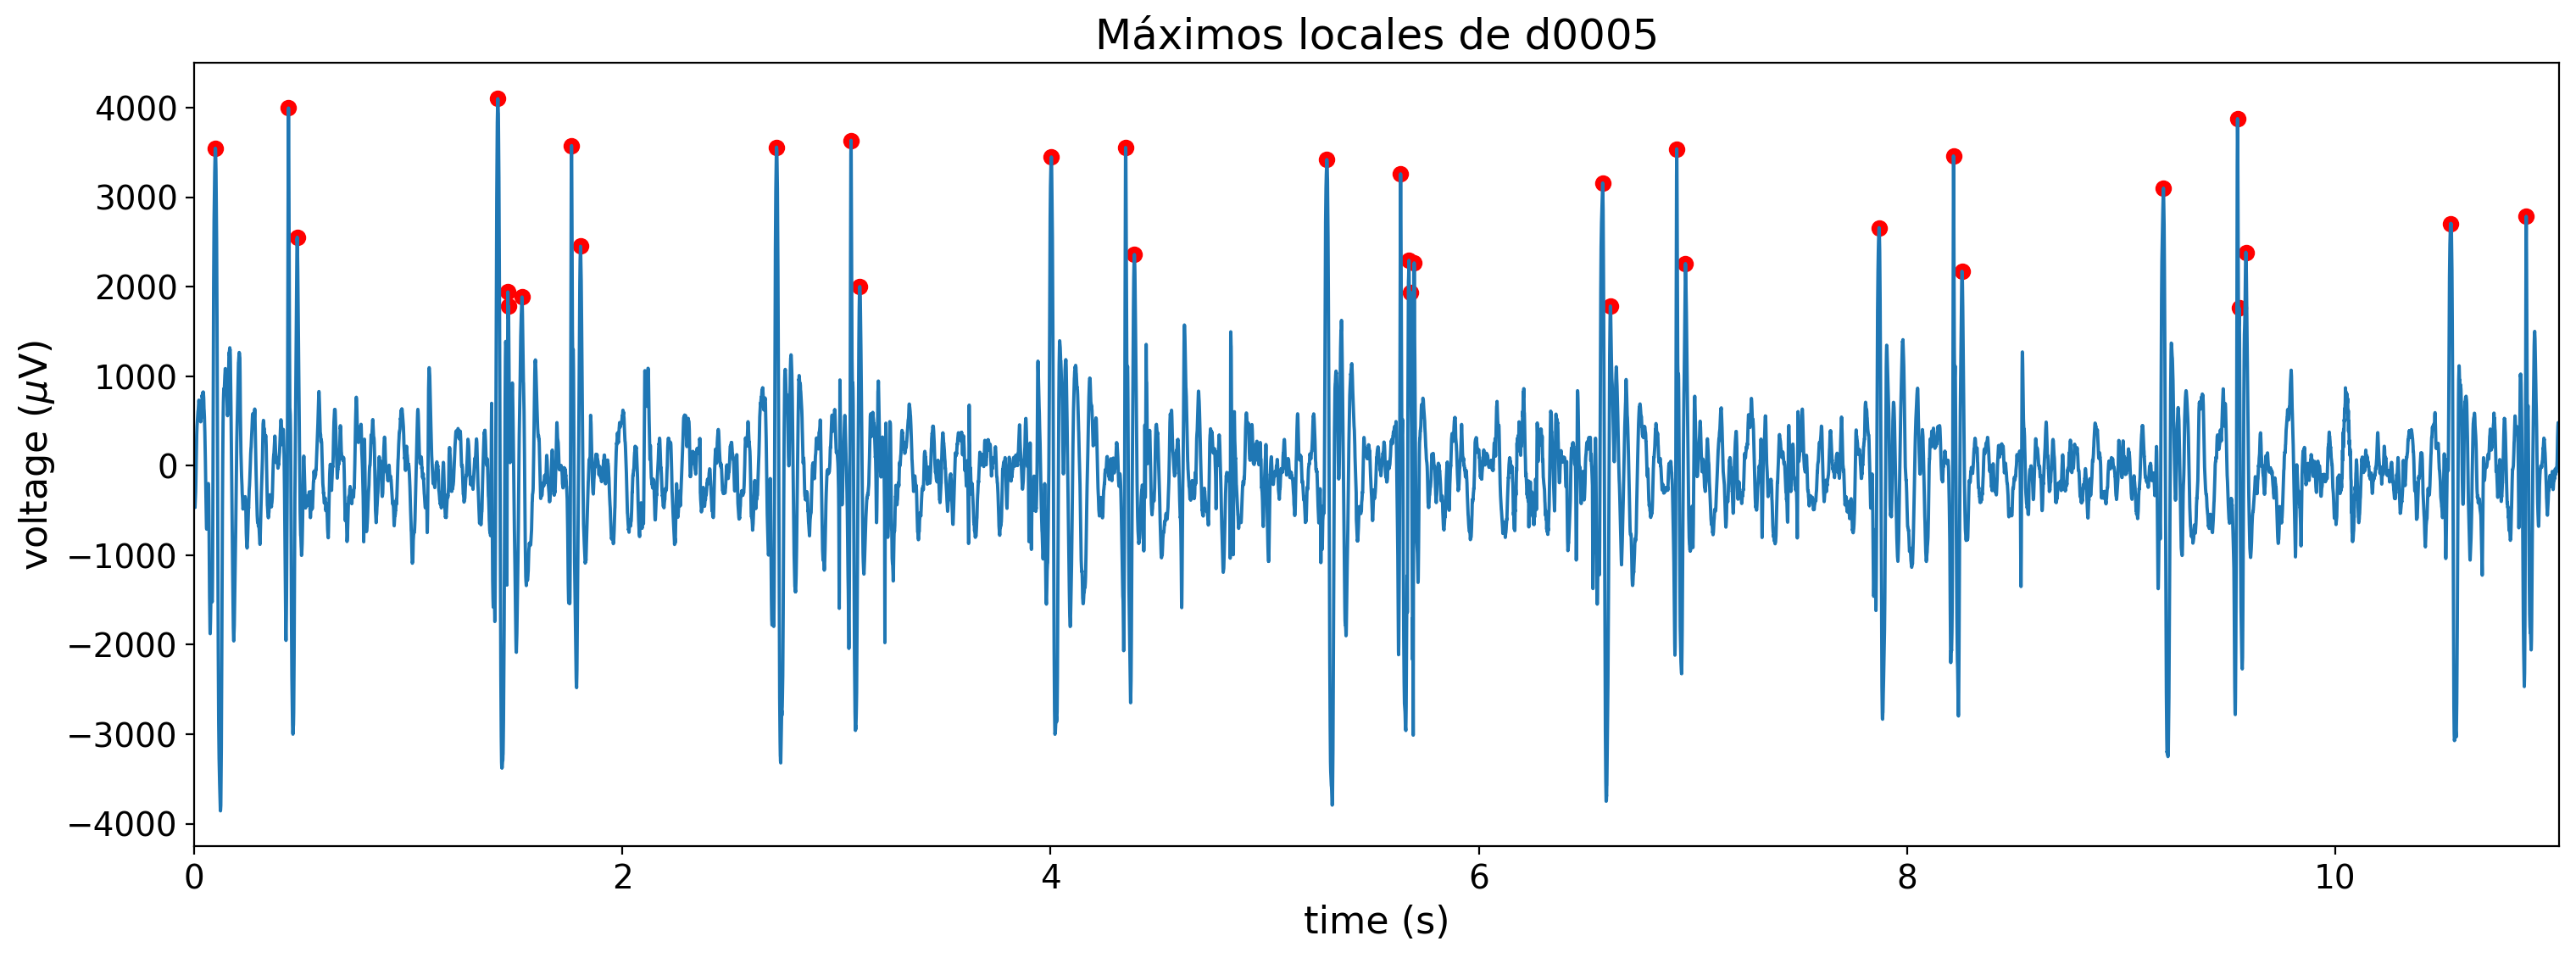

In [55]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r') #Nuevo comando para trazar los puntos de los máximos locales
plt.title("Máximos locales de d0005") #Se le agregó nombre a las gráficas para mejor visualización
plt.show()

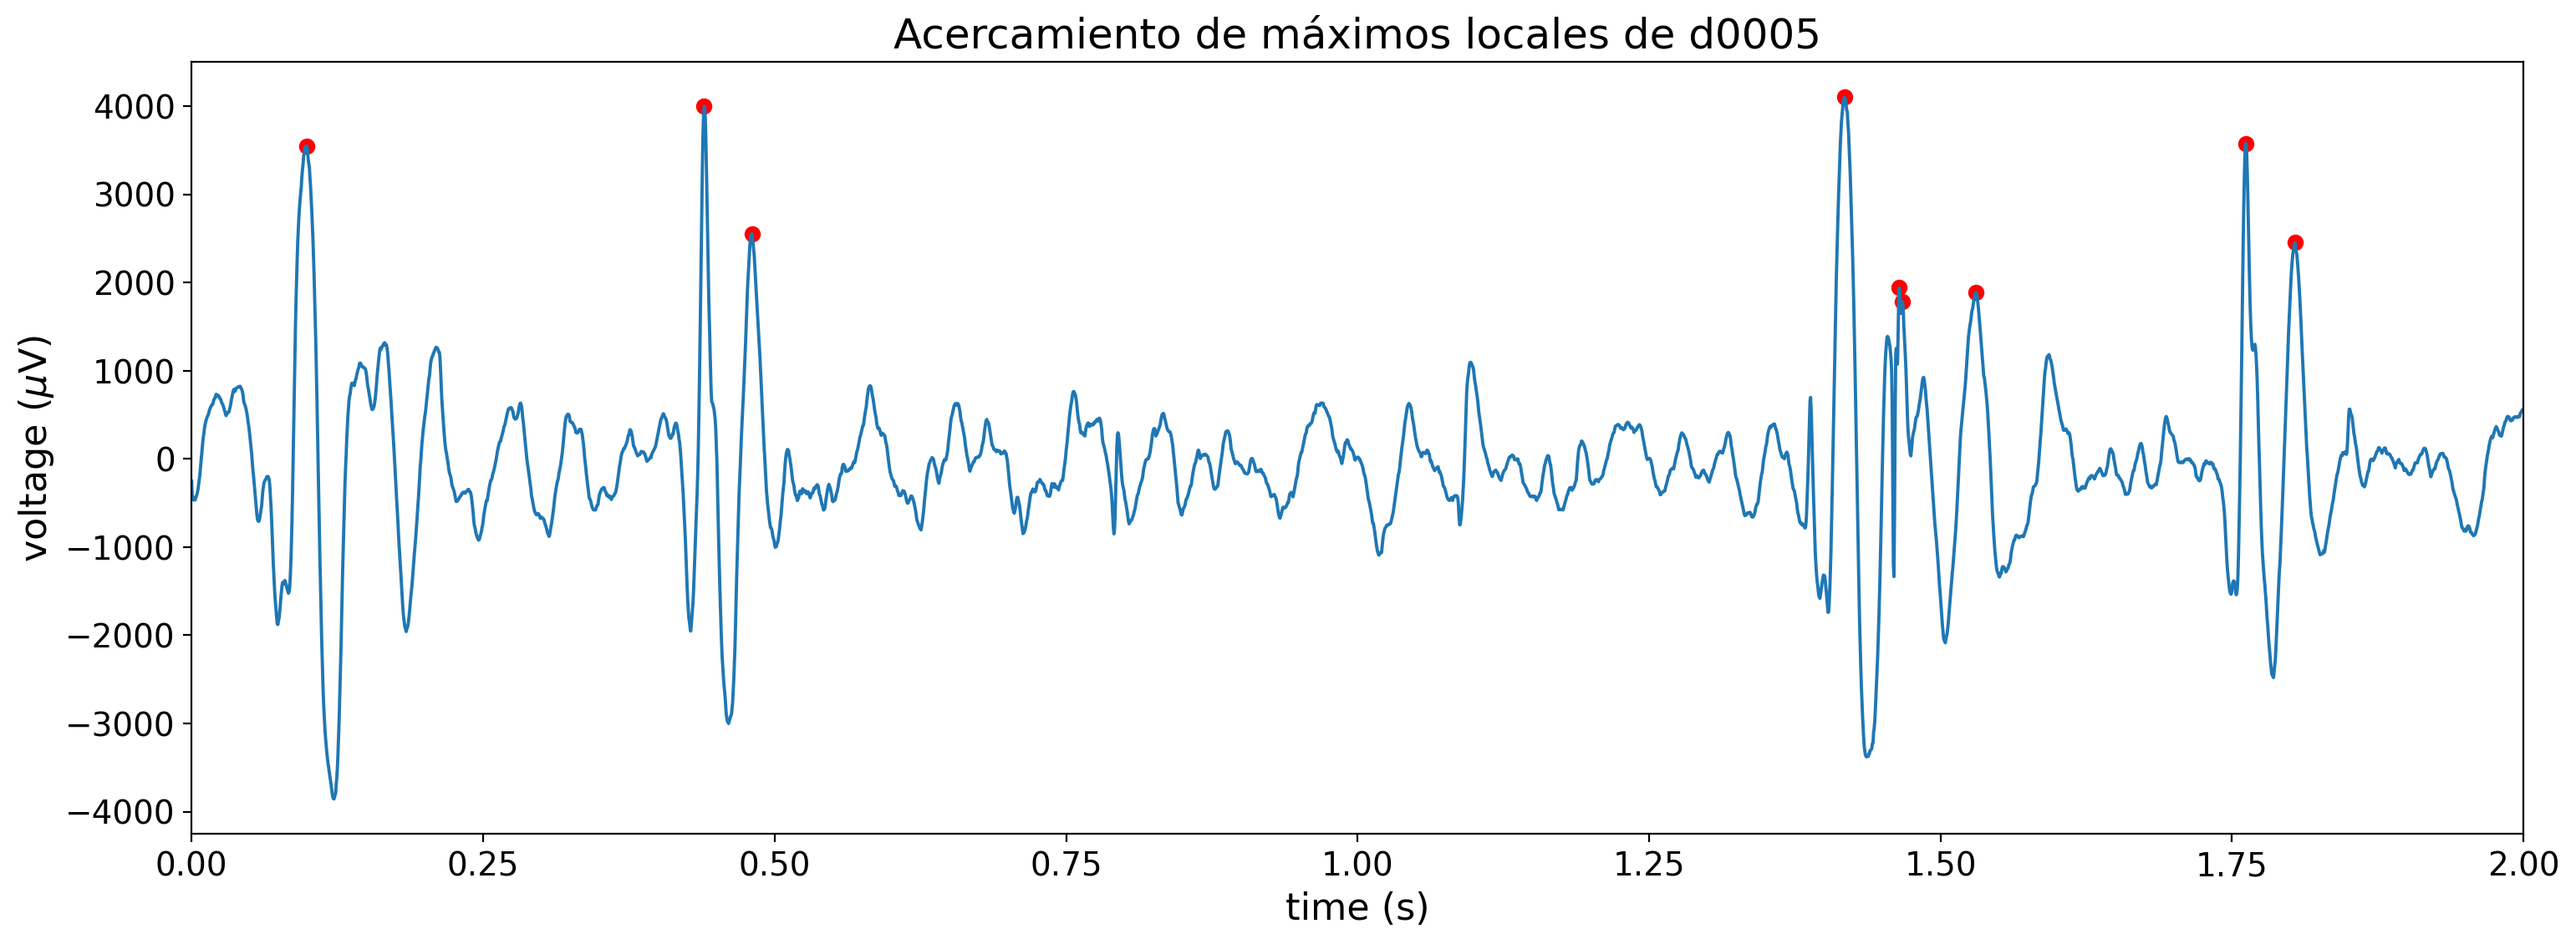

In [56]:
# Acercamiento de d0005
# Puntos arbitrarios elegidos
init_sec = 0
end_sec = 2
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000]) #Aquí se observa la multiplicación por 2000 en vez de 10000
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.title("Acercamiento de máximos locales de d0005")
plt.show()

In [57]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 179.22606924643586


In [58]:
#Obtención de la frecuencia
#Utiliza los puntos máximos de pasos anteriores
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

#Se calculan punto importantes para la generación de las gráficas como lo es por ejemplo std_vec_plus (Frecuencia más desviación)
mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

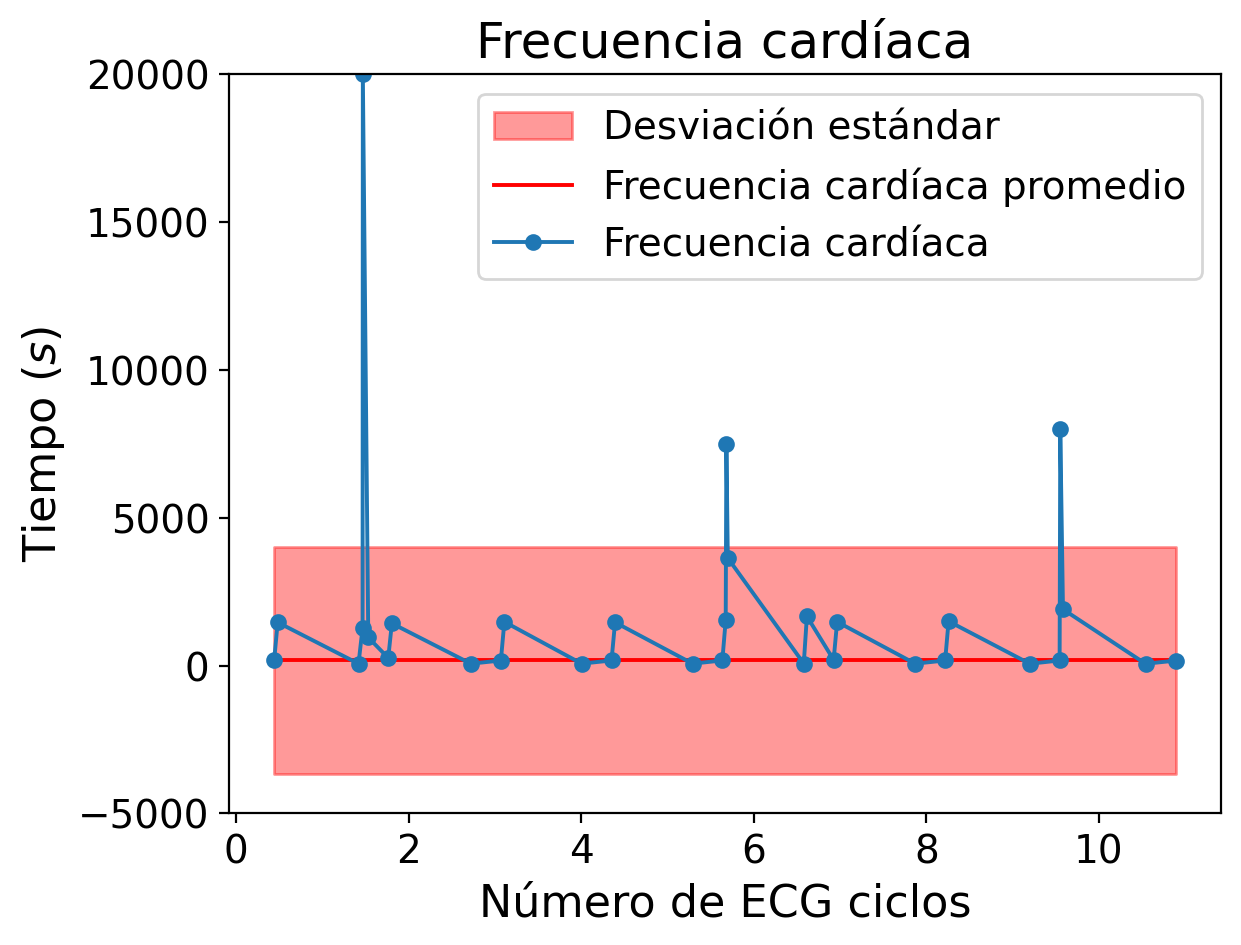

In [60]:
#Gráfica de desviación
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación estándar", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca promedio")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
plt.ylim((-5000, 20000)) #Se modifican los límites porque posee aún mayor desviación
plt.title("Frecuencia cardíaca")
plt.xlabel(r'Número de ECG ciclos')
plt.ylabel(r'Tiempo ($s$)')
plt.legend()
plt.show()

In [61]:
#Datos para ECG c0009
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/c0009.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

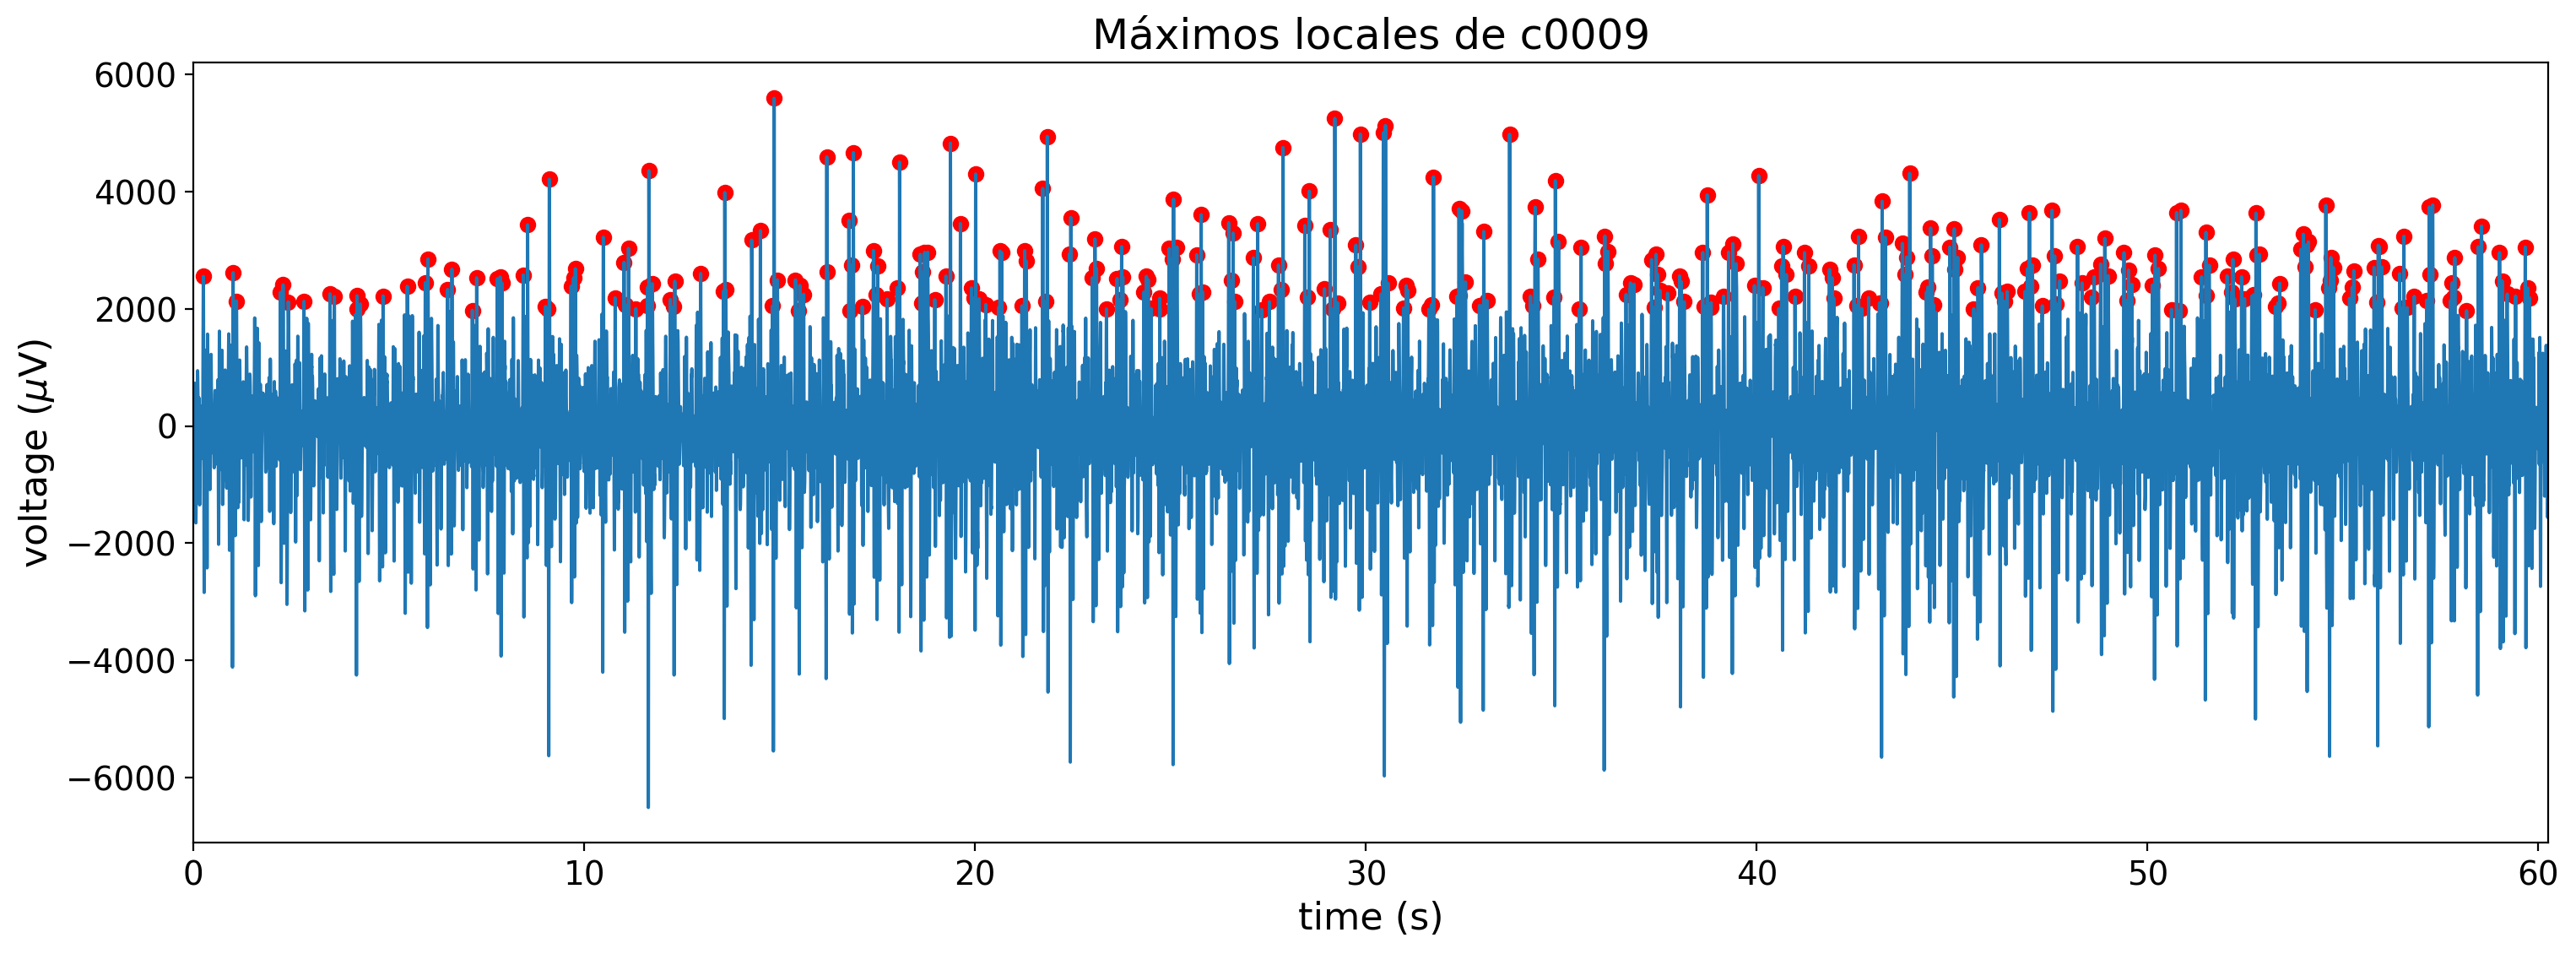

In [62]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r') #Nuevo comando para trazar los puntos de los máximos locales
plt.title("Máximos locales de c0009") #Se le agregó nombre a las gráficas para mejor visualización
plt.show()

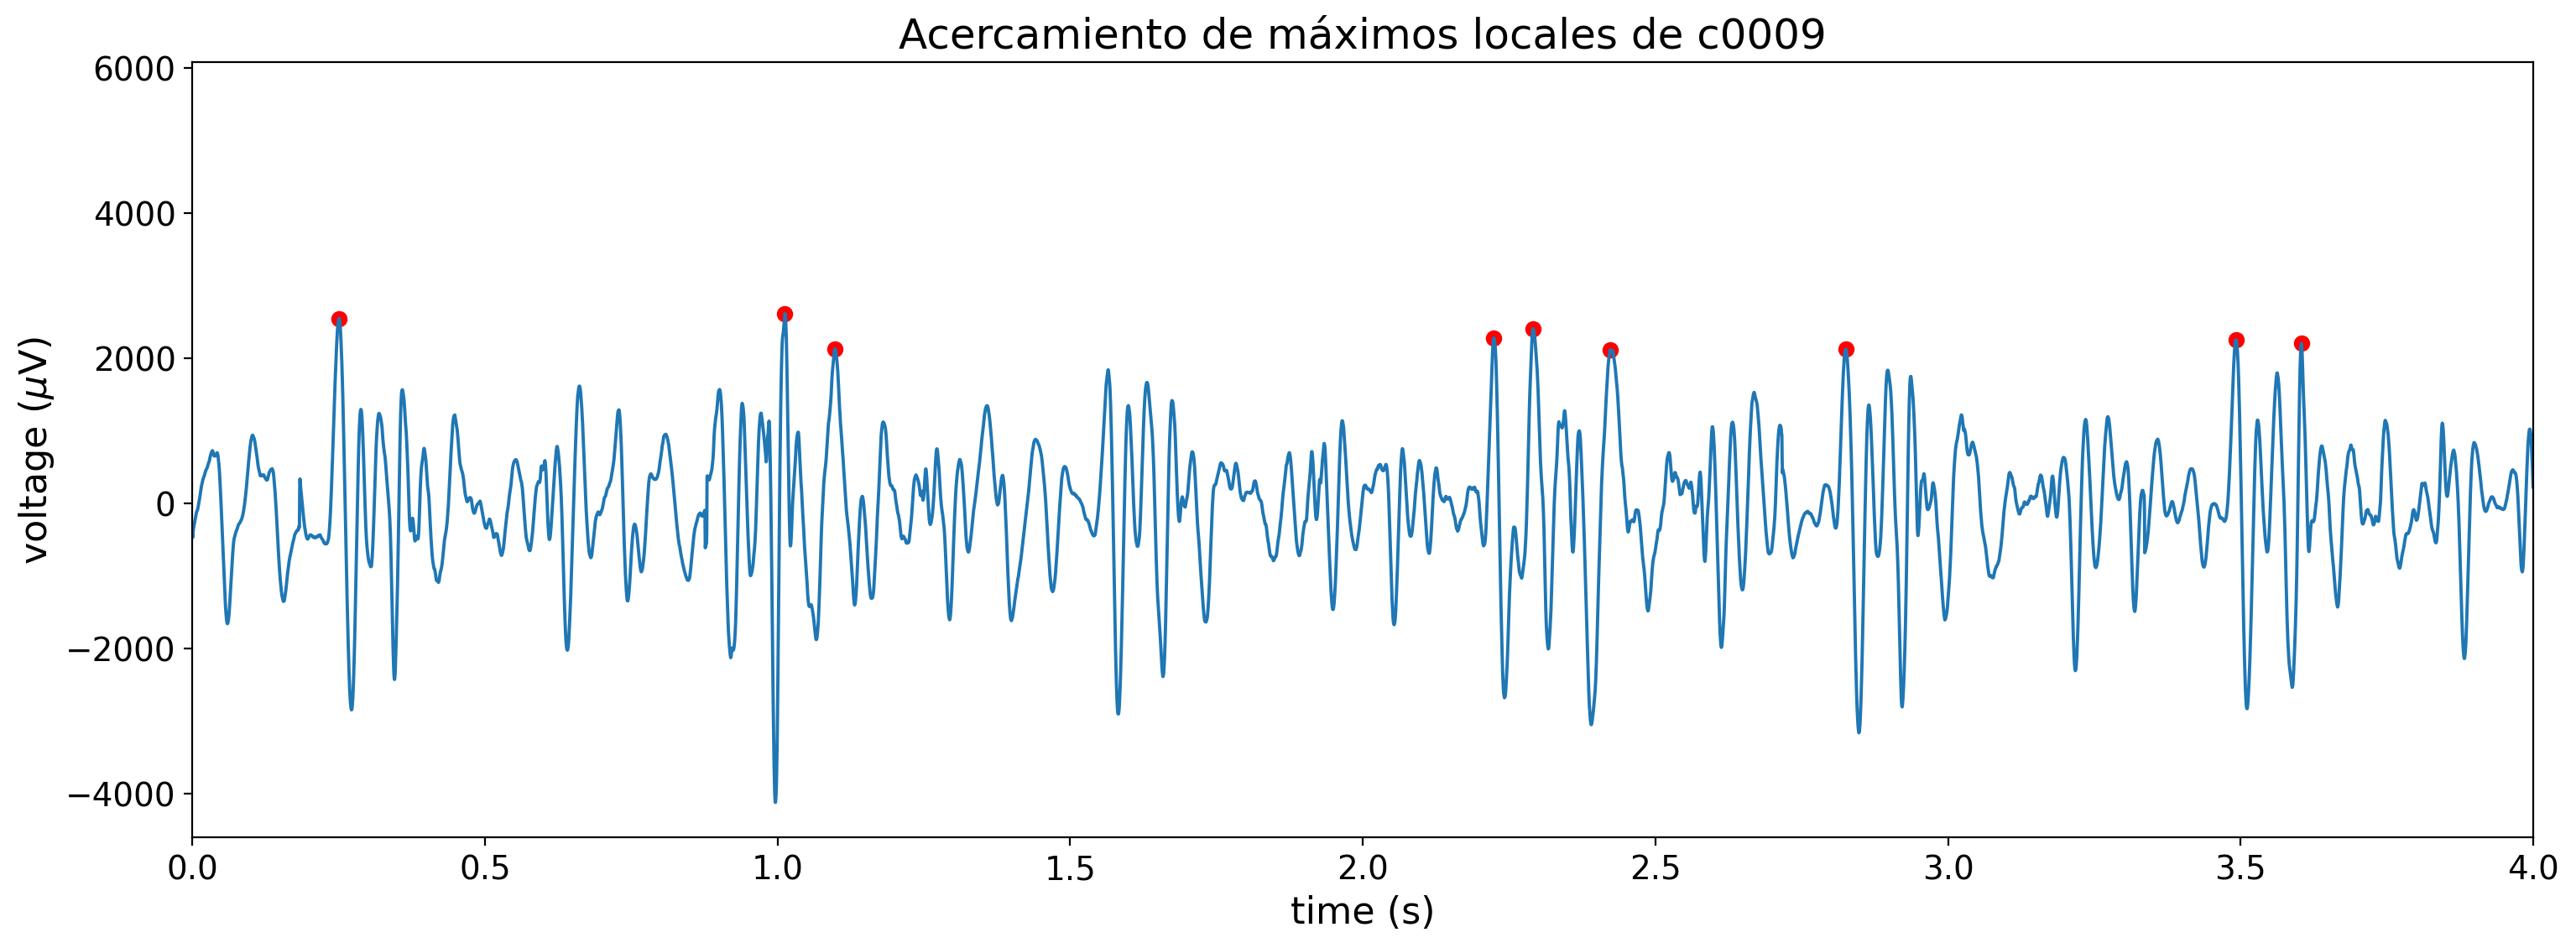

In [64]:
# Acercamiento de c0009
# Puntos arbitrarios elegidos
init_sec = 0
end_sec = 4
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000]) #Aquí se observa la multiplicación por 2000 en vez de 10000
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.title("Acercamiento de máximos locales de c0009")
plt.show()

In [65]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 321.61704669919345


In [66]:
#Obtención de la frecuencia
#Utiliza los puntos máximos de pasos anteriores
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

#Se calculan punto importantes para la generación de las gráficas como lo es por ejemplo std_vec_plus (Frecuencia más desviación)
mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

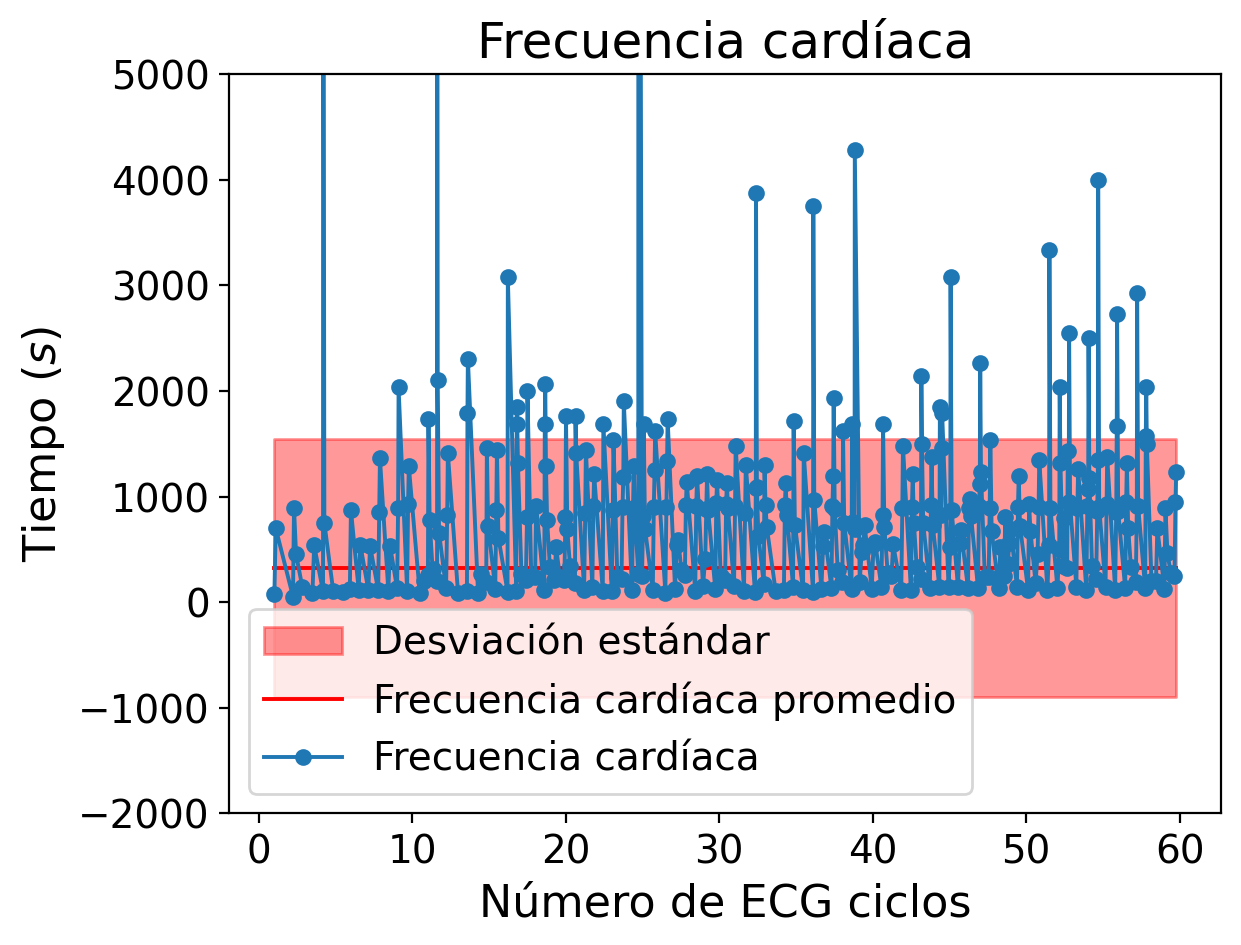

In [72]:
#Gráfica de desviación
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación estándar", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca promedio")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
plt.ylim((-2000, 5000))
plt.title("Frecuencia cardíaca")
plt.xlabel(r'Número de ECG ciclos')
plt.ylabel(r'Tiempo ($s$)')
plt.legend()
plt.show()

In [78]:
#Datos para ECG a0113
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/a0113.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

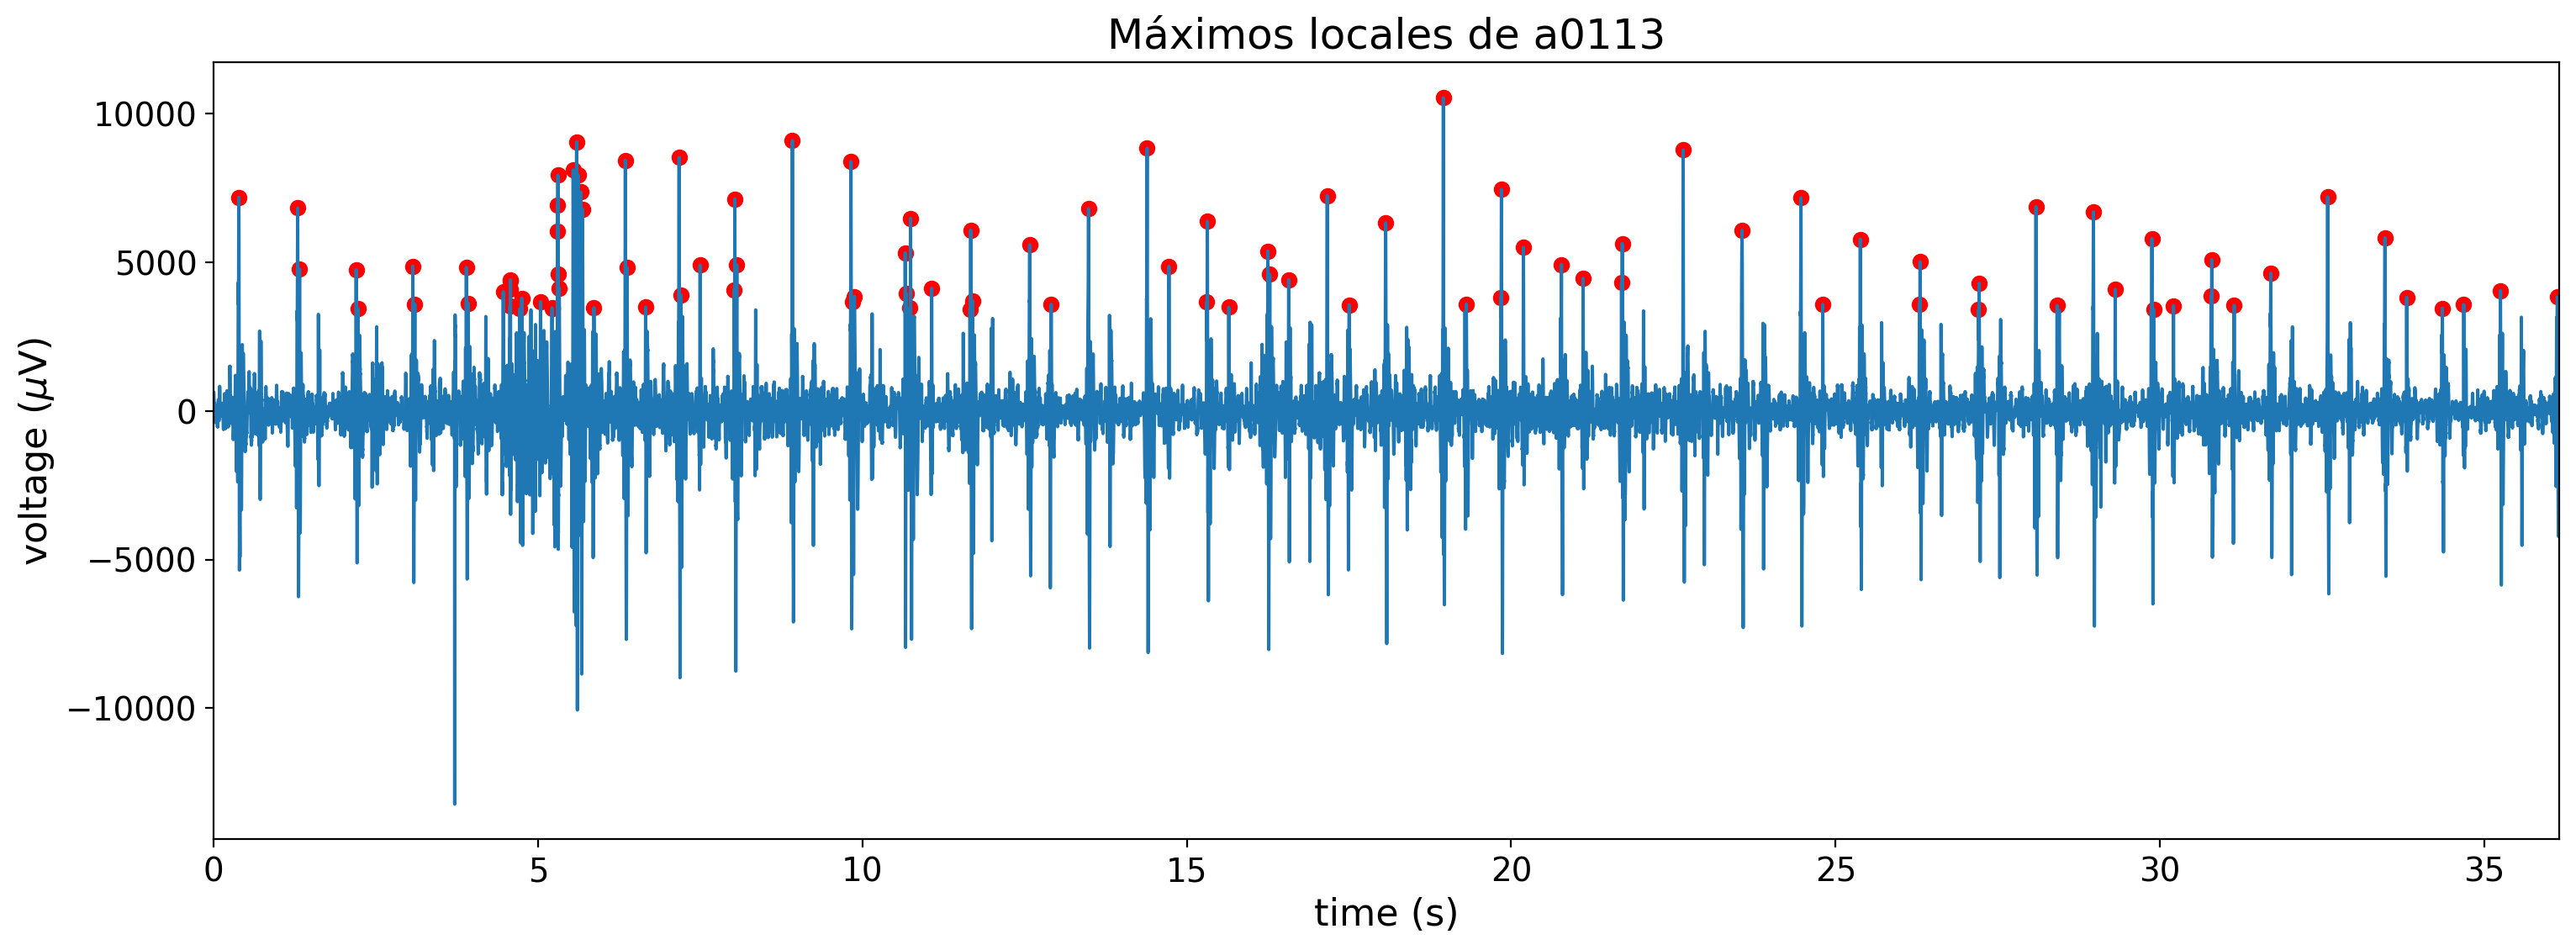

In [79]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r') #Nuevo comando para trazar los puntos de los máximos locales
plt.title("Máximos locales de a0113") #Se le agregó nombre a las gráficas para mejor visualización
plt.show()

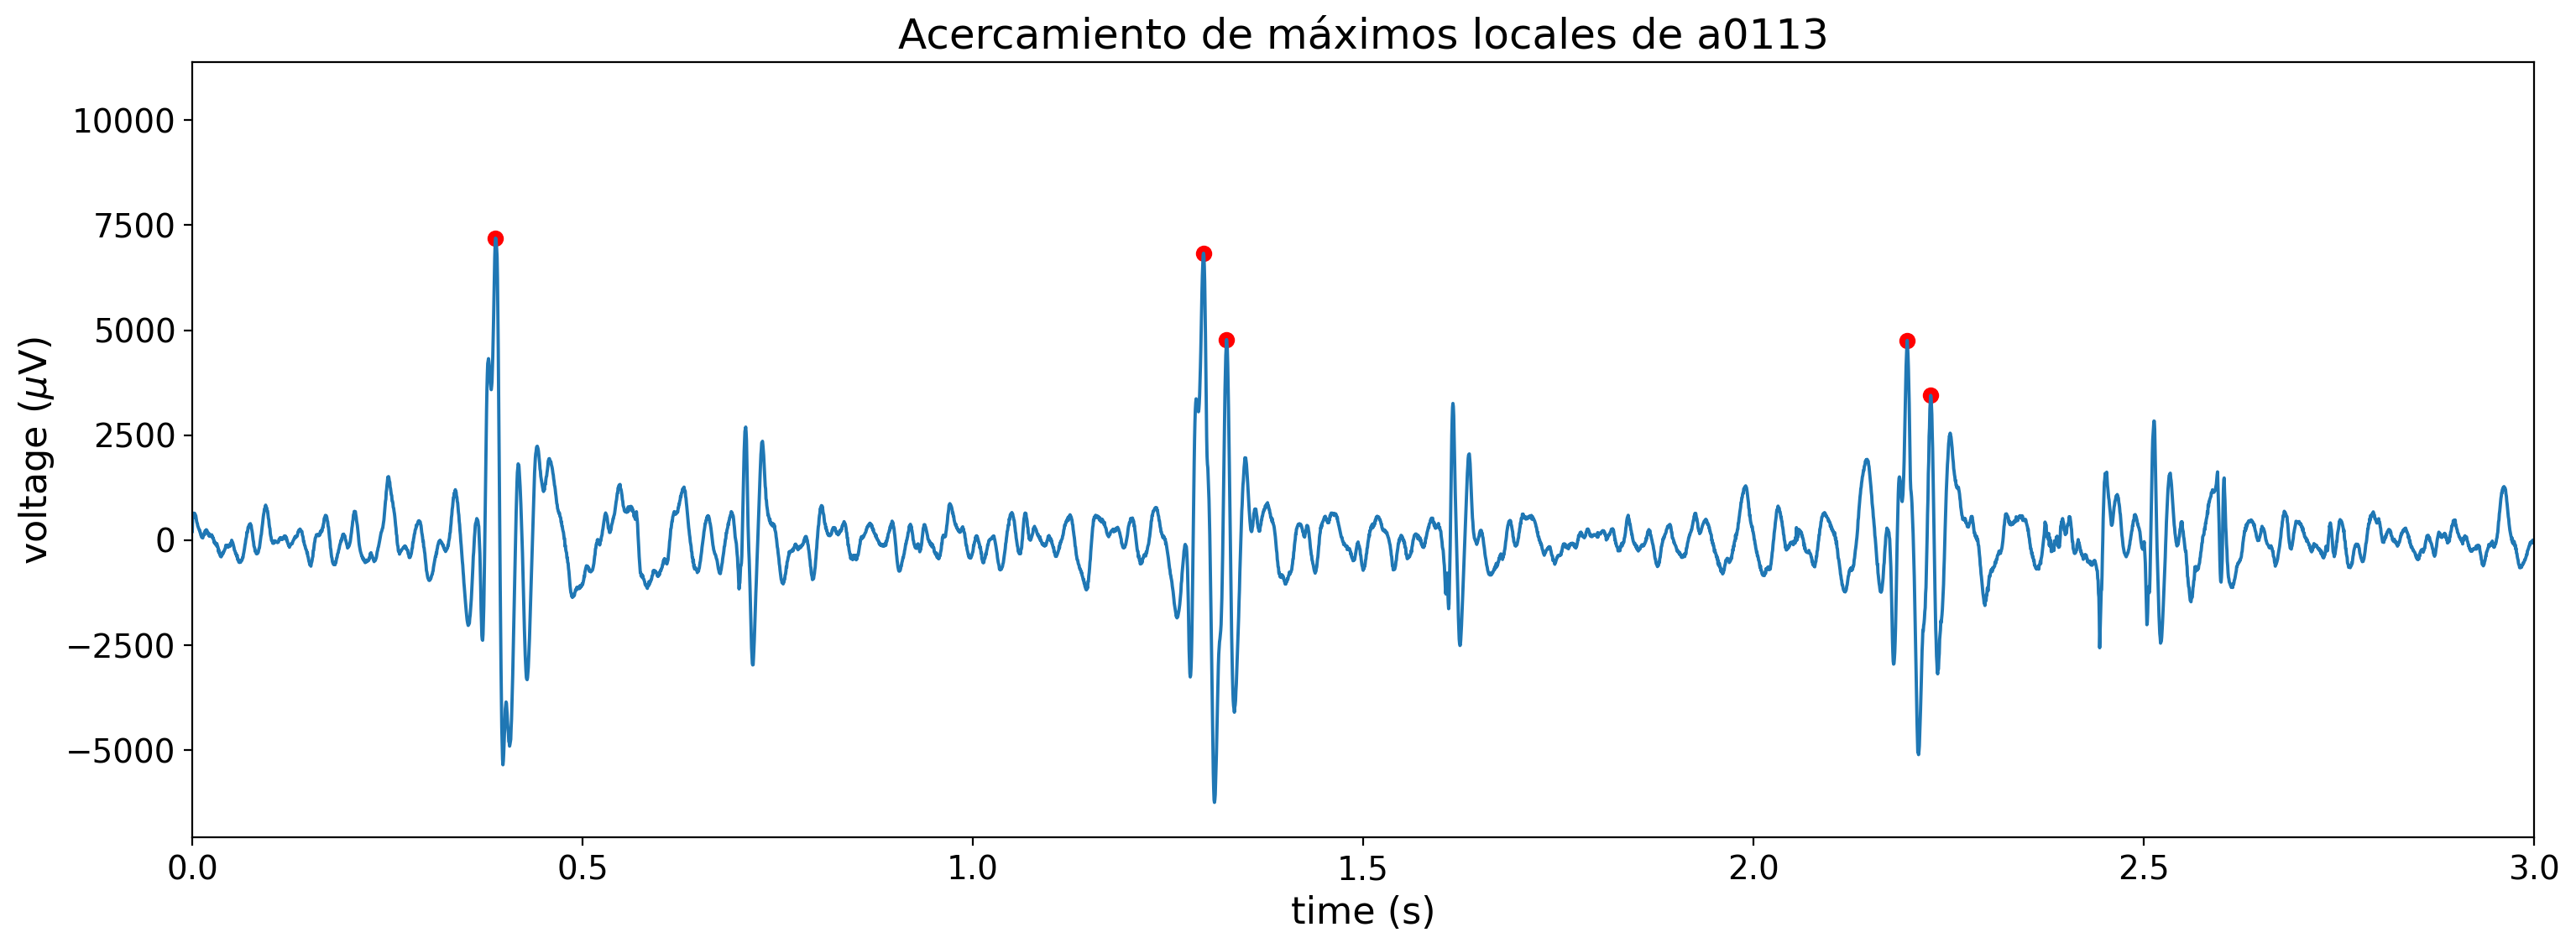

In [83]:
# Acercamiento de a0113
# Puntos arbitrarios elegidos
init_sec = 0
end_sec = 3
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000]) #Aquí se observa la multiplicación por 2000 en vez de 10000
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.title("Acercamiento de máximos locales de a0113")
plt.show()

In [84]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 167.61862613578214


In [85]:
#Obtención de la frecuencia
#Utiliza los puntos máximos de pasos anteriores
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

#Se calculan punto importantes para la generación de las gráficas como lo es por ejemplo std_vec_plus (Frecuencia más desviación)
mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

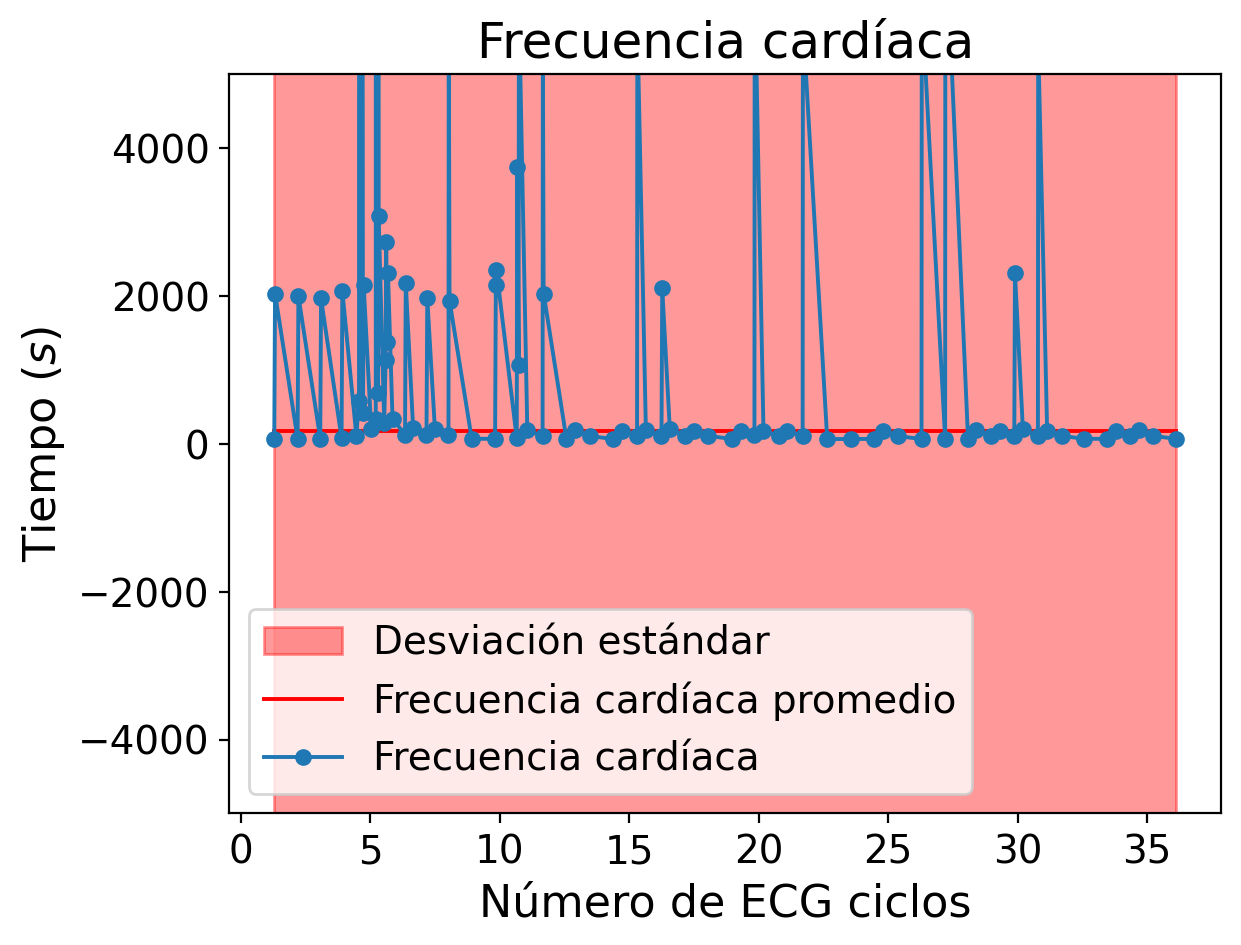

In [90]:
#Gráfica de desviación
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación estándar", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca promedio")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
plt.ylim((-5000, 5000))
plt.title("Frecuencia cardíaca")
plt.xlabel(r'Número de ECG ciclos')
plt.ylabel(r'Tiempo ($s$)')
plt.legend()
plt.show()

In [94]:
#Datos para ECG a0009
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/a0009.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

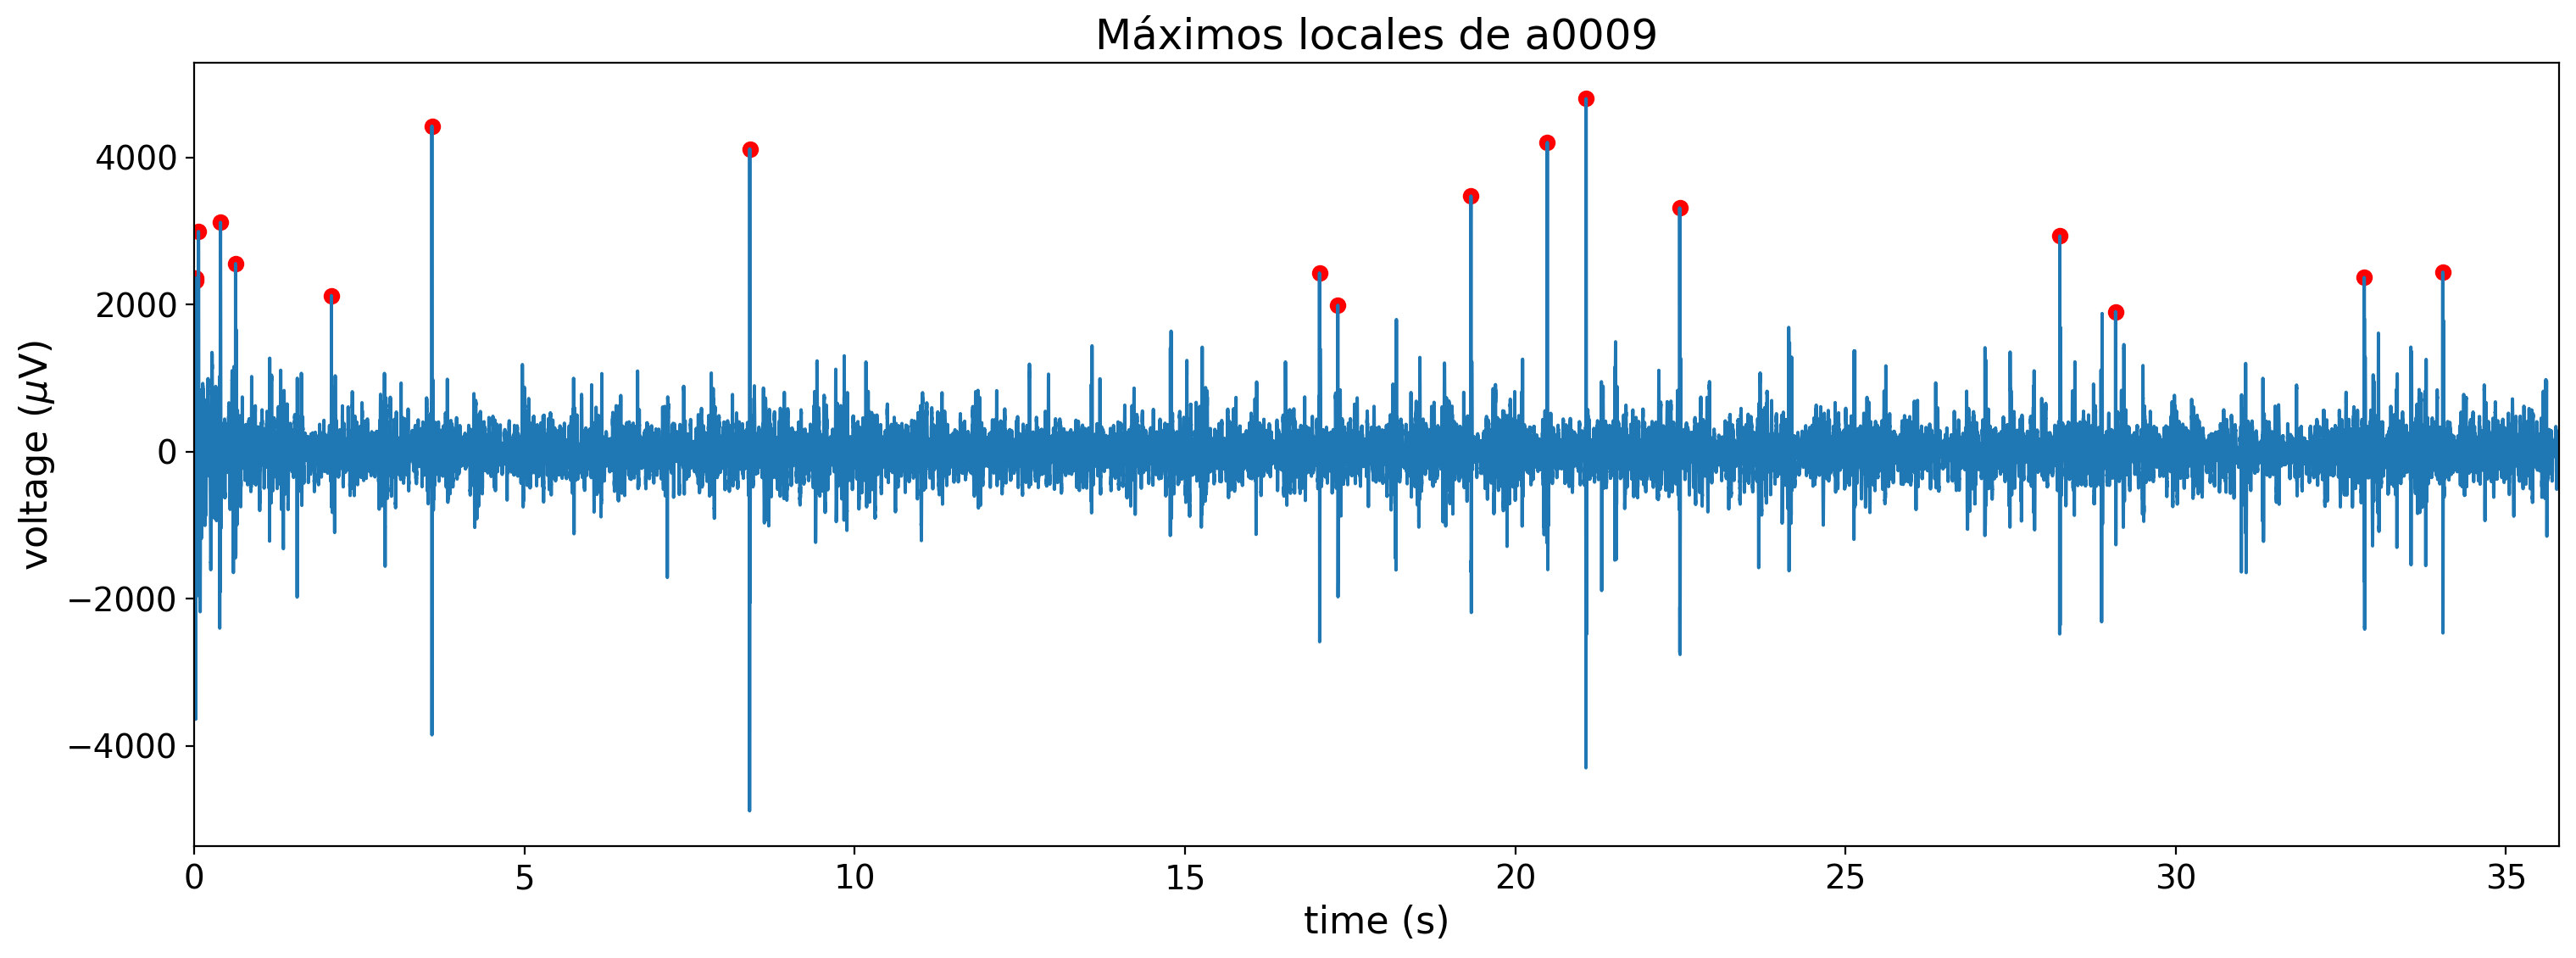

In [95]:

plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r') #Nuevo comando para trazar los puntos de los máximos locales
plt.title("Máximos locales de a0009") #Se le agregó nombre a las gráficas para mejor visualización
plt.show()

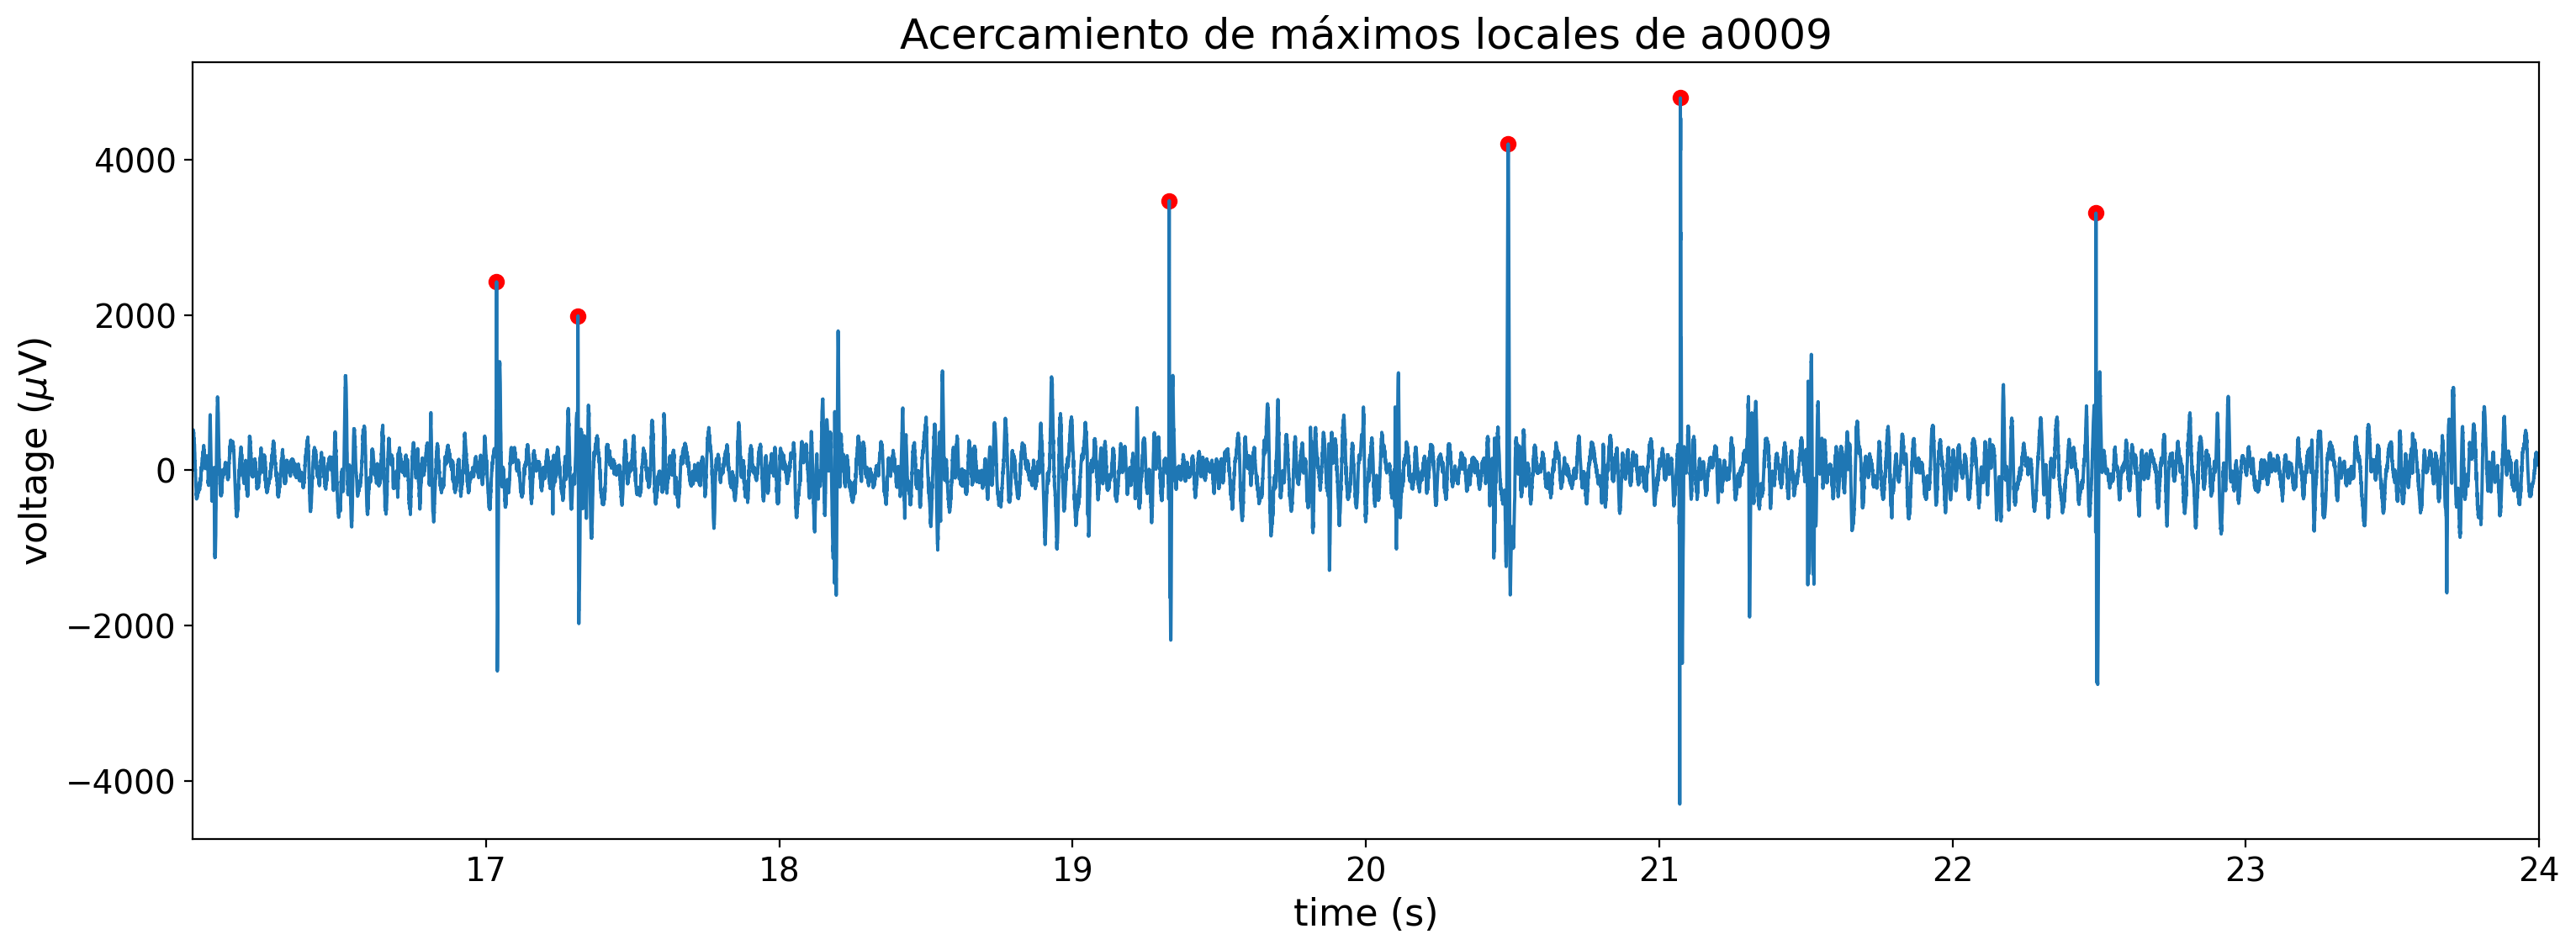

In [97]:
# Acercamiento de a0009
# Puntos arbitrarios elegidos
init_sec = 16
end_sec = 24
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*2000],timeECG[end_sec*2000]) #Aquí se observa la multiplicación por 2000 en vez de 10000
plt.plot(timeECG[init_sec*2000:end_sec*2000], waveData[init_sec*2000:end_sec*2000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.title("Acercamiento de máximos locales de a0009")
plt.show()

In [98]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 30.162963790479115


In [99]:
#Obtención de la frecuencia
#Utiliza los puntos máximos de pasos anteriores
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

#Se calculan punto importantes para la generación de las gráficas como lo es por ejemplo std_vec_plus (Frecuencia más desviación)
mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

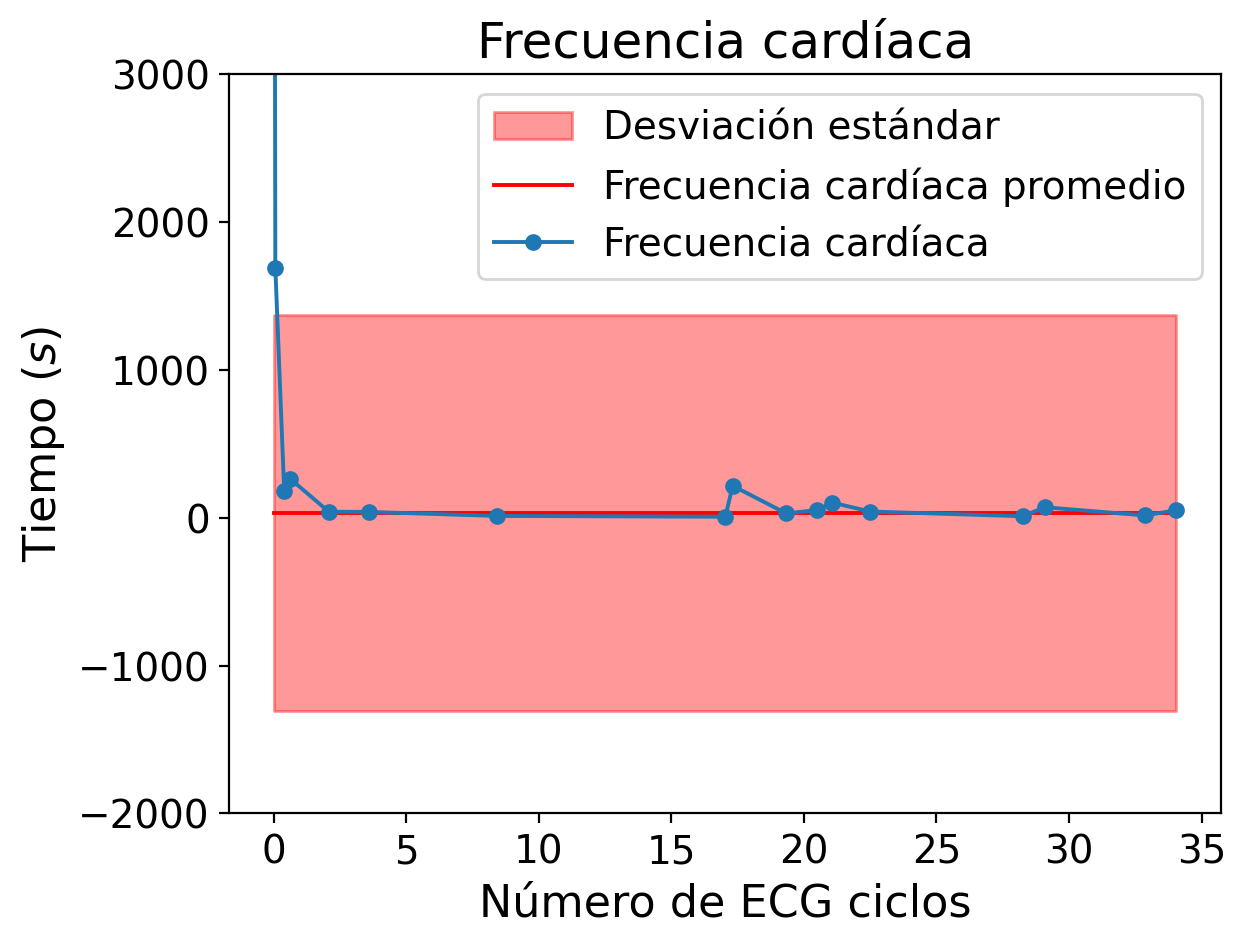

In [100]:
#Gráfica de desviación
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación estándar", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca promedio")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
plt.ylim((-2000, 3000))
plt.title("Frecuencia cardíaca")
plt.xlabel(r'Número de ECG ciclos')
plt.ylabel(r'Tiempo ($s$)')
plt.legend()
plt.show()

Con estos resultados observamos como tan solo un tercio de la señales poseían las caracterísiticas que el código necesitaba para el funcionamiento correcto. Además, todas ellas sufrienron los siguientes errores a la hora de calcular la frecuencia cardiáca. Los aspectos más relevantes a destacar son los siguientes:\
- Los gráficos vuelven a marcar más de un máximo local en cada uno de los ciclos, ocasionando un fallo en el resto de cálculos.
- A la hora de realizar el acercamiento, se optó por buscar las partes con mayor estabilidad, decisión que no llegó a generar mucho ayuda al código.
- Las frecuencias cardíacas nunca dieron valores dentro del estándar mencionado ([60-100] LPM).
- Las gráficas demuestran una desviación estándar muy elevada y hasta punto que sobresalen de la gráfica. Aunque se cambiaron los límites de la gráfica para observar todos los puntos, en algunos casos no conviene debido a que dificultaría la vista de la frecuencia cardíaca promedio.

#Casos de Error
No solo existe un problema relacionado a el cálculo equívoco de las frecuencias, sino que, 10 de los 15 archivos de audio no son capaces de ser analizados por la función. Al igual que el caso anterior, tomaremos una muestra principal para la explicación de los errores.

In [101]:
#Datos para ECG f0010
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/f0010.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


En vez de simplemente compliar el código como sucede en los casos normales, en este caso imprime un mensaje de error. Este menciona que, los valores de calculados sobre el máximo local sobrepasan los que puede representar la variable encargada de guardar los datos.\
Esto ocasiona que no sea posible la generación de gráficas y mucho menos el cálculo de la frecuencia.

In [102]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 0.0


Como se observa, muestra una frecuencia de 0 LPM, lo cual, no es cierto. Como la fórmula para obtener los datos es por medio de los máximos locales y no posee ninguno que sea capaz de ser calculado, el total de máximos es 0, por ende, la fórmula da 0.\
Para las 9 señales restantes tan solo se obtendrá el mesaje de error con el objetivo de demostrar que sucede lo mismo.

In [103]:
#Datos para ECG f0006
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/f0006.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [104]:
#Datos para ECG f0003
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/f0003.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [105]:
#Datos para ECG e00255
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/e00255.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [106]:
#Datos para ECG d00016
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/d00016.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [108]:
#Datos para ECG c0003
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/c0003.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [109]:
#Datos para ECG b0119
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/b0119.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [110]:
#Datos para ECG b0035
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/b0035.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [111]:
#Datos para ECG b0001
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/b0001.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


In [112]:
#Datos para ECG a00043
timeECG, waveData = ecg("/content/drive/MyDrive/Audios/a00043.wav")

mxs_indices = detecta_maximos_locales(timeECG, waveData)

<ipython-input-6-836ead5ea37d>:8: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


#Análisis de resultados
La segunda parte del proyecto trajo consigo problemas relacionados al código que en un principio no se esperaban. Sin embargo, estos errores fueron de gran ayuda para comprender aún mejor las cualidades propias de una señal que, aunque todas eran ECG, poseen diferencias no tan marcadas que solo por los errores se lograron distingui. Ejemplo de ello son sus puntos máximos locales, donde un solo ciclo es capaz de confudir el código por posee amplitudes muy parecidas que los refleje como ciclos diferentes.\
Otro aspecto a destacar es el hecho de que no necesariamente la frecuencia cardíaca fue calculado de manera erronea. Se debe tener en cuenta que dentro de los archivos de audio algunos eran de paciente con problemas cardíacos y las anomalías también podían estar relacionadas a ello.\
Por un lado, el codigo posee defectos que, de ser modificados lograrían mejorar de gran manera el código. Cambios tan simples como colocar en la primera parte la impresión de todas las señales después de haber obtenido todos los datos para evitar algún problema. También, cambios más sofisticados como implementar la función que identifique la frecuencia de muestreo para algunas partes del código donde se utilizan los conocidos "magic numbers" en vez de datos más fáciles de comprender. Así cómo implementar mejor la función que falla para encontar los máximos locales de algunos archivos.\
Por otro lado, es importante mencionar que el código cumple con una gran variedad de herramientas muy bien implementadas y fáciles de utilizar como lo es la función encargada de obtener los datos normales para las gráficas o la creación de la gráfica de frencuencia cardíaca. Muchas de estas valiosas herramientas promueven el reconocimiento de los errores del código sin la neceidad de que el usuario tenga por si solo que resolverlos.

#Conclusión Final
A lo largo del proyecto se ha promovido el uso correcto de las herramientas aprendidas conforme avanza el curso sobre el tratamiento y análisis de señales. Además, las herramientas digitales demuestran poseer un gran aporte para todo lo relacionado a señales. Estos aportes no solo mejoran en una dirección, sino que, sus aportes van desde la ayuda a futuros ingenieros que trabajarán toda su vida con estos temas de una manera más dinámica, mejora en la comprensión de ECG para ayudar en las labores de los médicos, y resulta ser una buena opción para iniciar en los pasos de crear código para resolver un sin fin de problemas de la sociedad acutal de manera rápida y eficaz.\
Aunado a ello, los objetivos del proyecto se lograron satisfacer con éxito, no solo aprendiendo de lo que se logró realizar sin problemas, sino que, de cada error, tanto de código como humano. Siendo un proceso empírico que desencadena en mejoras que no estuvieron propuesta en el incio del proyecto.\
En definitiva, el mundo relacionado a las señales es inmenso. Tan solo profundizando en análisis y script, se puede llegar a poseer un manejo idioneo de las mismas y generar así soluciones para nuestro día a día.

#Referencias del proyecto
Oppenheim, A. V., Schafer, R. W., y Buck, J. R. (2011). *Tratamiento de señales en tiempo discreto*.\
Kachuee, M., Fazeli, S., y Sarrafzadeh, M. (2018). *ECG Heartbeat Classification: A Deep Transferable Representation*. Recuperado de https://arxiv.org/pdf/1805.00794.pdf \
Sanagustín, A. (2023). *¿Cuál es la Frecuencia Cardíaca Normal?* [Video]. https://www.youtube.com/shorts/oaBVijT2xvA  


# Referencias del código utilizado

[BackyardBrains, 2017] BackyardBrains (2009-2017). Experiment: Heart Action Potentials. https://backyardbrains.com/experiments/heartrate. Accessed December 20, 2019.

[Boron and Boulpaep, 2012] Boron, W. F. and Boulpaep, E. L. (2012). Medical physiology, 2e updated edition e-book: with student consult online access. Elsevier health sciences.

[Cadogan, 2019] Cadogan, M. (2019). PR Interval. https://litfl.com/pr-interval-ecg-library/ Accessed May 8, 2020.

[ECGpedia, 2013] ECGpedia (2013). Conduction. https://en.ecgpedia.org/wiki/Conduction. Accessed May 7, 2020.

[Kantz and Schreiber, 2004] Kantz, H. and Schreiber, T. (2004). Nonlinear time series analysis, volume 7. Cambridge university press.

[Larkin, 2019] Larkin, J. (2019). QRS Interval. https://litfl.com/qrs-interval-ecg-library/. Accessed May 8, 2020.

[Nurses Learning, 1999] Nurses Learning (1999). EKG Interpretation. https://www.nurseslearning.com/courses/nrp/nrp1619/Section%202/index.htm. Accessed May 7, 2020.